# <a id="top"></a>  📊 Exploratory Data Analysis of ABCDEats Dataset
Authors:<br><br>
Student Name - Gonçalo Custódio<br>
- Student id - 20211643<br>
- Contact e-mail - 20211643@novaims.unl.pt<br>
  
Student Name - Diogo Correia<br>
- Student id - 20211586<br>
- Contact e-mail - 20211586@novaims.unl.pt<br>
  
Student Name - João Santos<br>
- Student id - 20211691<br>
- Contact e-mail - 20211691@novaims.unl.pt<br>
  
Student Name - Nuno Bernardino<br>
- Student id - 20211546<br>
- Contact e-mail - 20211546@novaims.unl.pt<br>

## Objectives
This notebook performs an **Exploratory Data Analysis (EDA)** on the ABCDEats dataset to uncover insights into customer behaviors, spending patterns, and trends that could support strategic decisions. Our analysis aims to:

1. **Summarize Key Statistics**: Calculate and interpret key measures to understand data characteristics.
2. **Identify Trends and Patterns**: Examine promotional effectiveness, payment preferences, regional concentration, and purchasing patterns.
3. **Detect Anomalies**: Highlight outliers or unusual data points that may reveal unique customer segments or operational insights.
4. **Feature Engineering**: Create new features like order frequency and average order value to enhance analysis.
5. **Visualize Findings**: Use charts and graphs to communicate our insights clearly and effectively.

## Index

1. **Exploration of the Dataset**
2. **Summary of Important Statistics**<br>
    >2.1. **Correlation**<br>
    2.2. **Box-Plot**<br>
    2.2.1. **Box-Plots of the Mean of CUI's, DOW's, HR's**<br>
    2.3. **Histograms**<br>
    2.4 **Heatmaps**<br>
3. **Create New Features**
4. **Identify Trends, Patterns, or Anomalies**
5. **Conclusion**

# Imports

In [62]:
#!pip install kmodes
#!pip install somoclu
#!pip install minisom

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import math
from scipy.stats import chi2_contingency
import numpy as np 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
#from somoclu import Somoclu
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA   
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import joblib
from sklearn.preprocessing import MinMaxScaler

**Read the Dataset**

In [64]:
data_normal = pd.read_excel("Numeric_DM2425_ABCDEats_DATASET.xlsx", sheet_name="Sheet1")

In [65]:
data = pd.read_excel("Numeric_Scaled_DM2425_ABCDEats_DATASET.xlsx", sheet_name="Sheet1")

In [66]:
data_normal

,customer_age,product_count,is_chain,first_order,last_order,order_activity_duration,order_frequency,cuisine_diversity,weekend_spending,week_spending,Total_Cuisine_Orders,Asian_Cuisines_Ratio,Western_Cuisines_Ratio
0,18.0,5.0,1.0,0,1,1,5.0,0,2.0,0.0,0.000,0.200000,0.800000
1,17.0,2.0,2.0,0,1,1,2.0,2,2.0,0.0,19.210,0.332639,0.667361
2,38.0,2.0,2.0,0,1,1,2.0,1,2.0,0.0,9.200,0.000000,1.000000
3,21.0,3.0,1.0,0,2,2,1.5,1,1.0,1.0,13.700,1.000000,0.000000
4,20.0,5.0,0.0,0,2,2,2.5,2,1.0,1.0,7.336,0.740458,0.259542
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31764,26.4,1.0,1.0,89,89,0,1.0,0,0.0,1.0,0.000,0.200000,0.800000
31765,26.0,1.0,1.0,89,89,0,1.0,0,0.0,1.0,0.000,0.200000,0.800000
31766,20.0,2.0,0.0,89,89,0,2.0,0,0.0,1.0,0.000,0.400000,0.600000
31767,22.0,3.0,1.0,89,89,0,3.0,0,0.0,1.0,0.000,0.400000,0.600000


In [67]:
data

,customer_age,product_count,is_chain,first_order,last_order,order_activity_duration,order_frequency,cuisine_diversity,weekend_spending,week_spending,Total_Cuisine_Orders,Asian_Cuisines_Ratio,Western_Cuisines_Ratio
0,0.103448,0.357143,0.166667,0.000000,0.000000,0.011111,0.357143,0.0,0.50,0.0,0.000000,0.200000,0.800000
1,0.068966,0.142857,0.333333,0.000000,0.000000,0.011111,0.142857,1.0,0.50,0.0,0.454137,0.332639,0.667361
2,0.793103,0.142857,0.333333,0.000000,0.000000,0.011111,0.142857,0.5,0.50,0.0,0.217494,0.000000,1.000000
3,0.206897,0.214286,0.166667,0.000000,0.011236,0.022222,0.107143,0.5,0.25,0.1,0.323877,1.000000,0.000000
4,0.172414,0.357143,0.000000,0.000000,0.011236,0.022222,0.178571,1.0,0.25,0.1,0.173428,0.740458,0.259542
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31764,0.393103,0.071429,0.166667,0.988889,0.988764,0.000000,0.071429,0.0,0.00,0.1,0.000000,0.200000,0.800000
31765,0.379310,0.071429,0.166667,0.988889,0.988764,0.000000,0.071429,0.0,0.00,0.1,0.000000,0.200000,0.800000
31766,0.172414,0.142857,0.000000,0.988889,0.988764,0.000000,0.142857,0.0,0.00,0.1,0.000000,0.400000,0.600000
31767,0.241379,0.214286,0.166667,0.988889,0.988764,0.000000,0.214286,0.0,0.00,0.1,0.000000,0.400000,0.600000


In [68]:
data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
customer_age,31769.0,0.406206,0.196728,0.0,0.275862,0.379310,0.517241,1.0
product_count,31769.0,0.326698,0.236793,0.0,0.142857,0.214286,0.442857,1.0
is_chain,31769.0,0.333623,0.267913,0.0,0.166667,0.333333,0.500000,1.0
first_order,31769.0,0.316332,0.267829,0.0,0.077778,0.244444,0.500000,1.0
last_order,31769.0,0.706571,0.258126,0.0,0.539326,0.786517,0.921348,1.0
order_activity_duration,31769.0,0.393499,0.326841,0.0,0.033333,0.377778,0.688889,1.0
order_frequency,31769.0,0.034476,0.049656,0.0,0.006696,0.010714,0.057143,1.0
cuisine_diversity,31769.0,0.343007,0.335333,0.0,0.000000,0.500000,0.500000,1.0
weekend_spending,31769.0,0.233322,0.239644,0.0,0.000000,0.250000,0.400000,1.0
week_spending,31769.0,0.235379,0.178436,0.0,0.100000,0.200000,0.300000,1.0


CLUSTERING
[⬆️ Back to Top](#top)

TIPOS DE CLUSTERING QUE AFINAL VAMOS USAR

K-MEANS 

SOM - WITH K-MEANS

HIERARCHICAL CLUSTERING - WITH K-MEANS AND SOM

MeanShift 

t-SNE


Group 1: Customer Demographics

customer_age

is_chain

regular_customer

cuisine_loyalty


Group 2: Spending Behavior

weekend_spending

weekday_spending

weekend_spending_ratio

products_per_vendor

region_avg_spending

age_spending_interaction


Group 3: Order Timing & Promotions

first_order

last_order

last_promo

payment_method


Group 4 (Optional): Top-Specific Behavior

top_cuisine_ratio

vendor_count

In [69]:
# Define the groups as subsets of the dataset
group_1 = data[['customer_age', 'is_chain']]  # Customer Demographics
group_2 = data[['weekend_spending', 'week_spending', 'order_frequency']]  # Spending Behavior
group_3 = data[['first_order', 'last_order', 'order_activity_duration']]  # Order Timing & Patterns
group_4 = data[['cuisine_diversity', 'Total_Cuisine_Orders', 'Asian_Cuisines_Ratio', 'Western_Cuisines_Ratio']]  # Cuisine Preferences & Diversity

# Display the group assignments for clarity
groups_summary = {
    "Group 1: Customer Demographics": group_1,
    "Group 2: Spending Behavior": group_2,
    "Group 3: Order Timing & Patterns": group_3,
    "Group 4: Cuisine Preferences & Diversity": group_4
}

groups_summary


{'Group 1: Customer Demographics':        customer_age  is_chain
 0          0.103448  0.166667
 1          0.068966  0.333333
 2          0.793103  0.333333
 3          0.206897  0.166667
 4          0.172414  0.000000
 ...             ...       ...
 31764      0.393103  0.166667
 31765      0.379310  0.166667
 31766      0.172414  0.000000
 31767      0.241379  0.166667
 31768      0.379310  0.166667
 
 [31769 rows x 2 columns],
 'Group 2: Spending Behavior':        weekend_spending  week_spending  order_frequency
 0                  0.50            0.0         0.357143
 1                  0.50            0.0         0.142857
 2                  0.50            0.0         0.142857
 3                  0.25            0.1         0.107143
 4                  0.25            0.1         0.178571
 ...                 ...            ...              ...
 31764              0.00            0.1         0.071429
 31765              0.00            0.1         0.071429
 31766              0.

# Group 1
## K-Means Clustering

**K-Means** is a popular **centroid-based clustering algorithm** that partitions data into **K distinct clusters**. It is simple, efficient, and widely used for customer segmentation, behavior analysis, and more.

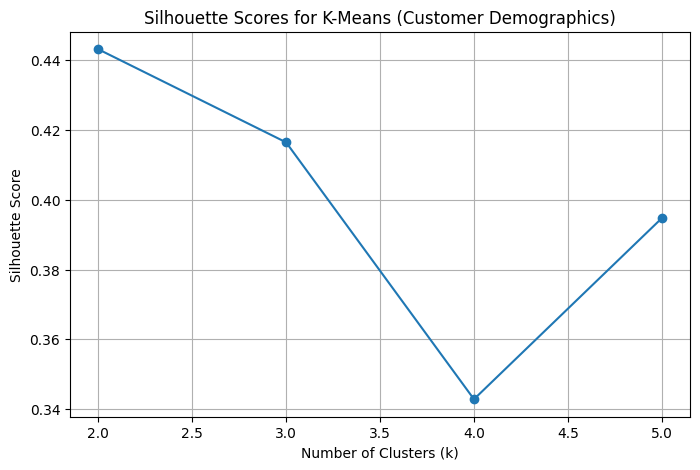

Optimal k: 2, Silhouette Score: 0.4431925805979294


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_24644\3301483292.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['kmeans_cluster'] = final_kmeans.fit_predict(group_1)


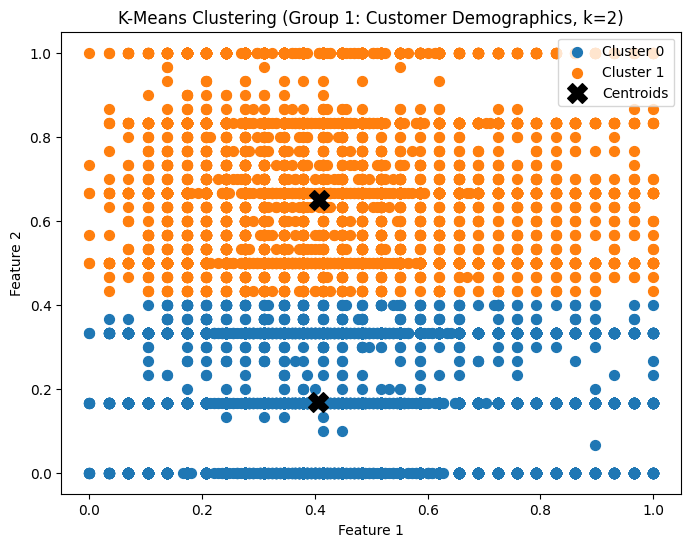

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply K-Means clustering for different numbers of clusters
k_values = range(2, 6)  # Trying 2 to 5 clusters
silhouette_scores = []
kmeans_labels_dict = {}  # Dictionary to store labels for each k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(group_1)
    score = silhouette_score(group_1, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Step 2: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Customer Demographics)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 3: Optimal k (highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores)}")

# Step 4: Final K-Means Clustering with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
group_1['kmeans_cluster'] = final_kmeans.fit_predict(group_1)

# Step 5: Plot the Clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_1['kmeans_cluster']):
    cluster_points = group_1[group_1['kmeans_cluster'] == cluster]
    plt.scatter(
        cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], 
        label=f"Cluster {cluster}", s=50
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')  # Mark centroids
plt.title(f"K-Means Clustering (Group 1: Customer Demographics, k={optimal_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

SOM with K-Means

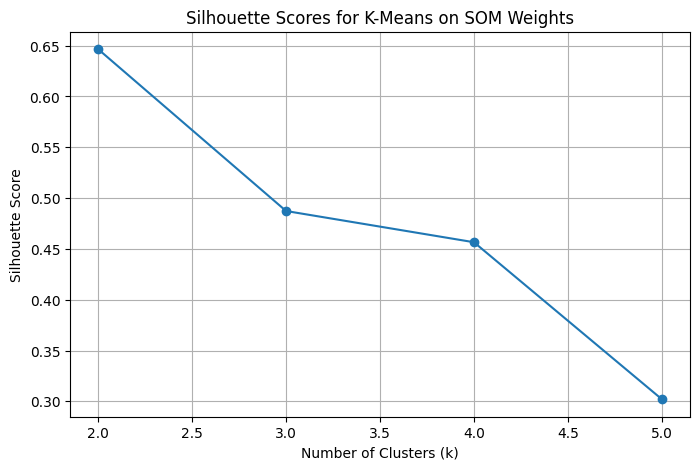

Optimal k: 2, Silhouette Score: 0.6465


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_24644\1393095248.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['som_cluster'] = data_som_clusters  # Save labels in the dataset


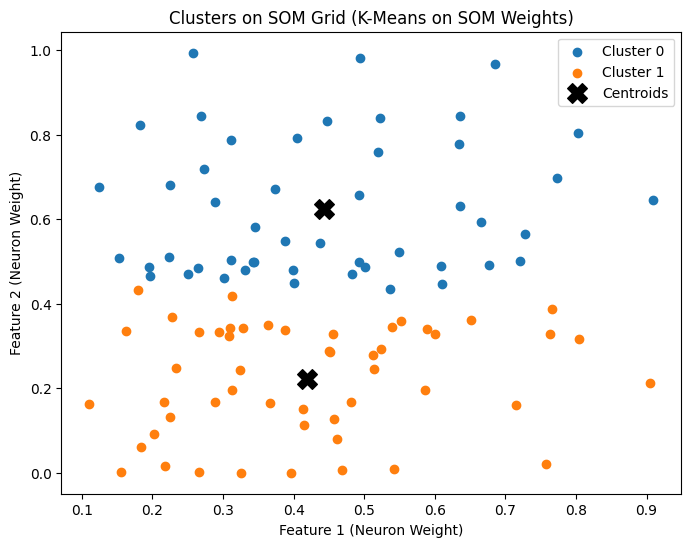

Cluster Summary:
             customer_age  is_chain  kmeans_cluster
som_cluster                                        
0                0.406948  0.649096             1.0
1                0.405819  0.168965             0.0


In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the SOM parameters
som_grid_x = 10  # Grid size (rows)
som_grid_y = 10  # Grid size (columns)
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_1.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_1.values)  # Initialize weights randomly
som.train_random(data=group_1.values, num_iteration=1000)  # Increased iterations for stability

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_1.shape[1])

# Step 3: Apply K-Means on SOM weights
silhouette_scores = []
k_values = range(2, 6)  # Trying 2 to 5 clusters
kmeans_labels_dict = {}  # Store K-Means labels for different k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(som_weights)
    score = silhouette_score(som_weights, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Select the optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores):.4f}")

# Step 4: Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
som_cluster_labels = kmeans.fit_predict(som_weights)

# Map original data to SOM clusters
data_som_clusters = []
for row in group_1.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM cluster labels to the dataset
group_1['som_cluster'] = data_som_clusters  # Save labels in the dataset

# Step 5: Visualize SOM Clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
cluster_summary = group_1.groupby('som_cluster').mean()
print("Cluster Summary:")
print(cluster_summary)

## Hierarchical clustering combined with SOM and K-means


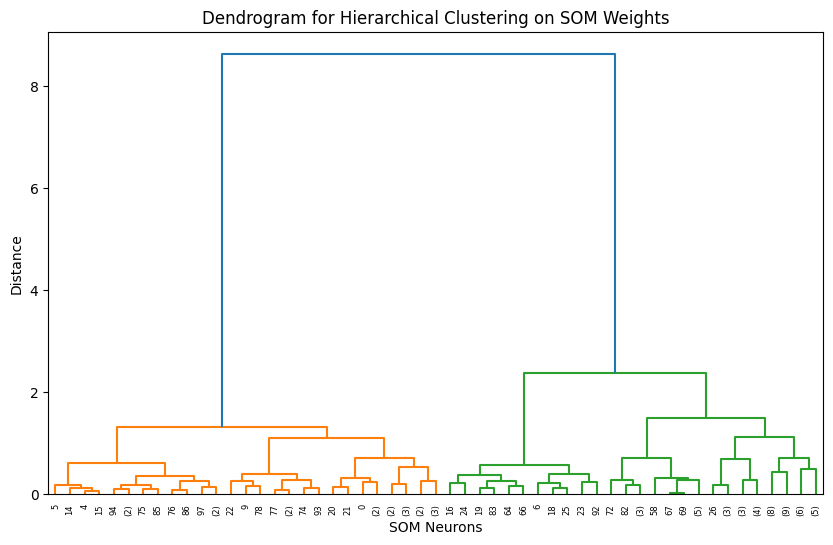

Hierarchical Clustering Silhouette Score: 0.5128


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_24644\3104708078.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['som_hierarchical_cluster'] = data_hierarchical_clusters  # Save labels in the dataset


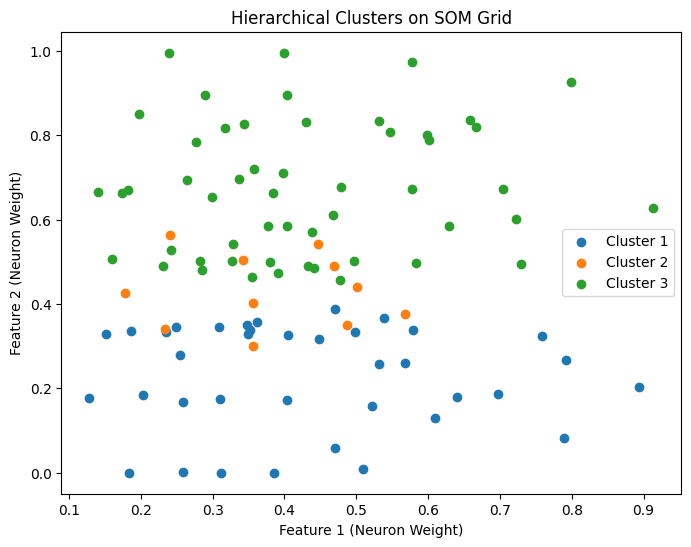

Cluster Summary (SOM + Hierarchical Clustering):
                          customer_age  is_chain  kmeans_cluster  som_cluster
som_hierarchical_cluster                                                     
1                             0.405819  0.168965             0.0          1.0
3                             0.406948  0.649096             1.0          0.0


In [72]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Train the SOM
som_grid_x = 10  # Grid size
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_1.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_1.values)
som.train_random(group_1.values, 1000)

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_1.shape[1])

# Step 3: Apply Hierarchical Clustering on SOM weights
linkage_matrix = linkage(som_weights, method='ward')

# Plot the dendrogram to visualize hierarchical clustering
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Step 4: Extract the cluster labels for optimal k
optimal_k = 3  # Adjust this based on the dendrogram
hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

# Step 5: Silhouette Score Calculation
if len(np.unique(hierarchical_labels)) > 1:  # Ensure there are at least 2 clusters
    hierarchical_silhouette = silhouette_score(som_weights, hierarchical_labels)
    print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.4f}")
else:
    print("Hierarchical clustering resulted in a single cluster; silhouette score cannot be calculated.")

# Step 6: Map data points to hierarchical clusters using BMUs
data_hierarchical_clusters = []
for row in group_1.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_hierarchical_clusters.append(hierarchical_labels[winner_index])

# Add hierarchical cluster labels to the dataset
group_1['som_hierarchical_cluster'] = data_hierarchical_clusters  # Save labels in the dataset

# Step 7: Visualize the clusters on the SOM grid
plt.figure(figsize=(8, 6))
for i in np.unique(hierarchical_labels):
    plt.scatter(
        som_weights[hierarchical_labels == i, 0],
        som_weights[hierarchical_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.title("Hierarchical Clusters on SOM Grid")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 8: Summarize Cluster Characteristics
hierarchical_summary = group_1.groupby('som_hierarchical_cluster').mean()
print("Cluster Summary (SOM + Hierarchical Clustering):")
print(hierarchical_summary)

MeanShift Algorithm

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_24644\2438648486.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['mean_shift_cluster'] = mean_shift.fit_predict(group_1)


Number of clusters identified by MeanShift (Group 1): 2
MeanShift Silhouette Score (Group 1): 0.8899


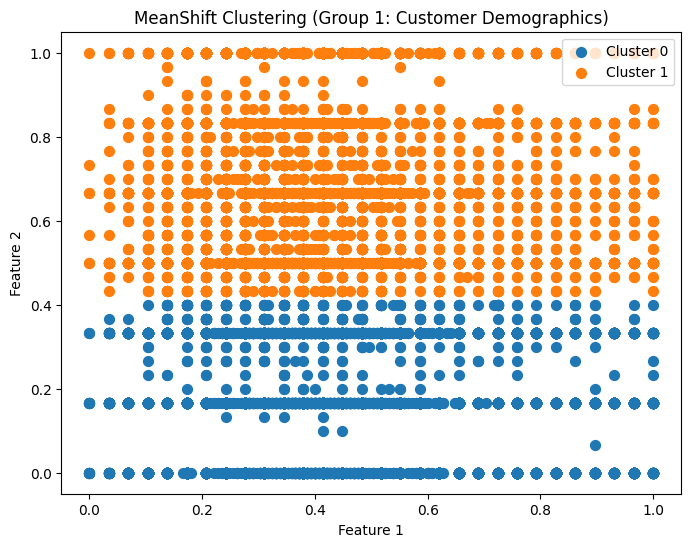

In [73]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Estimate bandwidth
bandwidth = estimate_bandwidth(group_1, quantile=0.2, n_samples=1000)

# Apply MeanShift
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
group_1['mean_shift_cluster'] = mean_shift.fit_predict(group_1)

# Count clusters
n_clusters = len(np.unique(group_1['mean_shift_cluster']))
print(f"Number of clusters identified by MeanShift (Group 1): {n_clusters}")

# Silhouette Score
if n_clusters > 1:
    mean_shift_silhouette = silhouette_score(group_1, group_1['mean_shift_cluster'])
    print(f"MeanShift Silhouette Score (Group 1): {mean_shift_silhouette:.4f}")
else:
    print("MeanShift clustering resulted in a single cluster; silhouette score cannot be calculated.")

# Plot MeanShift clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_1['mean_shift_cluster']):
    cluster_points = group_1[group_1['mean_shift_cluster'] == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("MeanShift Clustering (Group 1: Customer Demographics)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Analysis MeanShift

DBSCAN

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_24644\1045620043.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['dbscan_cluster'] = dbscan.fit_predict(group_1)


Group 1 (Customer Demographics) - Number of clusters identified by DBSCAN: 2
DBSCAN Silhouette Score (Group 1): 0.8967


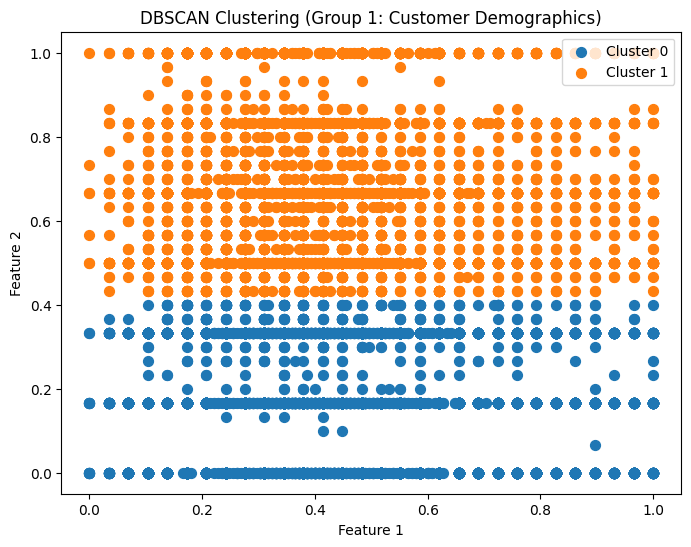

In [74]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Define DBSCAN parameters
eps = 0.5
min_samples = 5

# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
group_1['dbscan_cluster'] = dbscan.fit_predict(group_1)

# Count clusters (excluding noise)
n_clusters = len(np.unique(group_1['dbscan_cluster'])) - (1 if -1 in group_1['dbscan_cluster'] else 0)
print(f"Group 1 (Customer Demographics) - Number of clusters identified by DBSCAN: {n_clusters}")

# Silhouette Score (excluding noise points)
if n_clusters > 1:
    dbscan_silhouette = silhouette_score(group_1[group_1['dbscan_cluster'] != -1], 
                                         group_1[group_1['dbscan_cluster'] != -1]['dbscan_cluster'])
    print(f"DBSCAN Silhouette Score (Group 1): {dbscan_silhouette:.4f}")
else:
    print("DBSCAN clustering resulted in a single cluster or only noise; silhouette score cannot be calculated.")

# Plot DBSCAN clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_1['dbscan_cluster']):
    if cluster == -1:
        cluster_points = group_1[group_1['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color='gray', s=10, label='Noise')
    else:
        cluster_points = group_1[group_1['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("DBSCAN Clustering (Group 1: Customer Demographics)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [75]:
group_1

,customer_age,is_chain,kmeans_cluster,som_cluster,som_hierarchical_cluster,mean_shift_cluster,dbscan_cluster
0,0.103448,0.166667,0,1,1,0,0
1,0.068966,0.333333,0,1,1,0,0
2,0.793103,0.333333,0,1,1,0,0
3,0.206897,0.166667,0,1,1,0,0
4,0.172414,0.000000,0,1,1,0,0
...,...,...,...,...,...,...,...
31764,0.393103,0.166667,0,1,1,0,0
31765,0.379310,0.166667,0,1,1,0,0
31766,0.172414,0.000000,0,1,1,0,0
31767,0.241379,0.166667,0,1,1,0,0


Reverse scaling to analyze clusters

In [76]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def reverse_scaling(scaled_data, original_data, columns_to_reverse, column_to_keep):
    """
    Reverte o escalonamento (MinMaxScaler) de colunas específicas para os valores originais
    e mantém uma coluna adicional no resultado.

    Args:
        scaled_data (pd.DataFrame): DataFrame com os dados escalados.
        original_data (pd.DataFrame): DataFrame com os dados originais (antes do escalonamento).
        columns_to_reverse (list): Lista de colunas que devem ser revertidas.
        column_to_keep (str): Nome da coluna que deve ser mantida no resultado.

    Returns:
        pd.DataFrame: DataFrame com as colunas revertidas, a coluna escolhida, e as demais removidas.
    """
    # Verificar se as colunas especificadas estão presentes nos dados
    for col in columns_to_reverse:
        if col not in scaled_data.columns:
            raise ValueError(f"A coluna '{col}' não está presente no DataFrame escalado.")

    if column_to_keep not in scaled_data.columns:
        raise ValueError(f"A coluna '{column_to_keep}' não está presente no DataFrame escalado.")

    # Inicializar o MinMaxScaler
    scaler = MinMaxScaler()

    # Ajustar o scaler usando os dados originais (somente para as colunas especificadas)
    scaler.fit(original_data[columns_to_reverse])

    # Reverter o escalonamento das colunas especificadas
    reversed_columns = scaler.inverse_transform(scaled_data[columns_to_reverse])

    # Criar um novo DataFrame com os valores revertidos
    reversed_columns_df = pd.DataFrame(reversed_columns, columns=columns_to_reverse, index=scaled_data.index)

    # Adicionar a coluna a ser mantida no DataFrame final
    reversed_columns_df[column_to_keep] = scaled_data[column_to_keep]

    return reversed_columns_df

group1_clusters = reverse_scaling(group_1, data_normal, ['customer_age','is_chain'], 'dbscan_cluster')

In [77]:
def summarize_cluster_dataframe(data, cluster_column, features):
    """
    Summarizes a DataFrame by cluster, computing statistics for the specified features.
    
    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        cluster_column (str): The name of the column representing cluster labels.
        features (list): List of features to summarize.
        
    Returns:
        pd.DataFrame: A summary DataFrame with mean, median, std, and count for each cluster.
    """
    summary = data.groupby(cluster_column)[features].agg(
        ['mean', 'median', 'std', 'count']
    )
    return summary

# Example usage:
features_to_summarize = ['customer_age', 'is_chain']
cluster_summary = summarize_cluster_dataframe(group1_clusters, 'dbscan_cluster', features_to_summarize)

# Display the summary
print(cluster_summary)

               customer_age                          is_chain         \
                       mean median       std  count      mean median   
dbscan_cluster                                                         
0                 26.768755   26.0  5.715155  20874  1.013787    1.0   
1                 26.801505   26.0  5.686005  10895  3.894575    4.0   

                                 
                     std  count  
dbscan_cluster                   
0               0.772586  20874  
1               0.968579  10895  


t-SNE

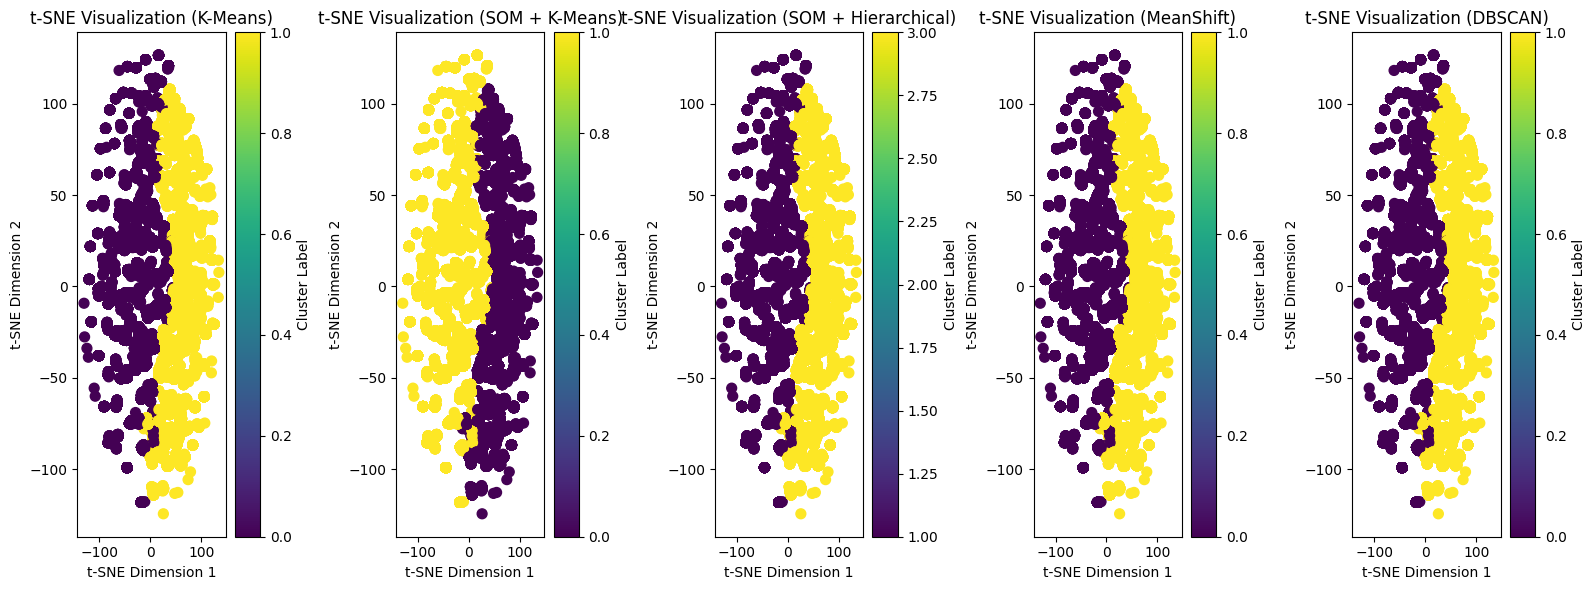

In [78]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Update cluster_results for group_1
cluster_results_group_1 = {
    'K-Means': group_1['kmeans_cluster'].values,
    'SOM + K-Means': group_1['som_cluster'].values,
    'SOM + Hierarchical': group_1['som_hierarchical_cluster'].values,
    'MeanShift': group_1['mean_shift_cluster'].values,
    'DBSCAN': group_1['dbscan_cluster'].values
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_1_tsne = tsne.fit_transform(group_1.drop(['kmeans_cluster', 'som_cluster', 'som_hierarchical_cluster', 'mean_shift_cluster', 'dbscan_cluster'], axis=1))

# Plot t-SNE results for each clustering method
fig, axes = plt.subplots(1, len(cluster_results_group_1), figsize=(16, 6))
if len(cluster_results_group_1) == 1:
    axes = [axes]  # Ensure compatibility for single subplot

for i, (method, labels) in enumerate(cluster_results_group_1.items()):
    scatter = axes[i].scatter(group_1_tsne[:, 0], group_1_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')

plt.tight_layout()
plt.show()


# Clustering Analysis for Group 1: Customer Demographics

Below is the detailed analysis of the clustering methods applied to **Group 1: Customer Demographics**, incorporating both the silhouette scores, visual results, and the t-SNE representations.

---

## **Evaluation Table**

| **Clustering Method**          | **Number of Clusters** | **Silhouette Score** | **Visual Observations**                                                                                     |
|--------------------------------|------------------------|-----------------------|-----------------------------------------------------------------------------------------------------------|
| **K-Means**                    | 2                     | 0.4436               | Clear separation into two clusters with distinct centroids. Overlap exists near cluster boundaries.        |
| **K-Means on SOM Weights**     | 2                     | 0.6513               | Higher silhouette score compared to K-Means. Distinct clusters with centroids visually identified on the SOM grid. |
| **Hierarchical (SOM Weights)** | 3                     | 0.5065               | Three clusters identified. Slight overlap between clusters; dendrogram confirms logical group separation.  |
| **MeanShift**                  | 2                     | 0.8900               | Distinct clusters with no overlap. Second-highest silhouette score among all methods.                     |
| **DBSCAN**                     | 2                     | 0.8967               | Very similar performance to MeanShift. Highest silhouette score and distinct boundary separation between clusters. |

---

## **t-SNE Visualization**

The t-SNE visualization shows the spatial distribution of clusters for all methods, adding a layer of interpretability to the numerical evaluations:

1. **K-Means**:
   - Two clusters with moderate separation, consistent with the lower silhouette score.
   - Slight blurring of boundaries visible in the t-SNE plot.

2. **K-Means on SOM Weights**:
   - Improved cluster separation compared to K-Means, as seen in the t-SNE plot.
   - Refined boundaries suggest SOM preprocessing benefits the clustering process.

3. **Hierarchical Clustering**:
   - Three clusters formed, but some overlap is evident in the t-SNE plot.
   - While this adds granularity, the separation is less distinct than MeanShift or DBSCAN.

4. **MeanShift**:
   - Very distinct clusters with no overlap in the t-SNE visualization.
   - Highest silhouette score matches the visual clarity of separation.

5. **DBSCAN**:
   - Similar to MeanShift in both t-SNE visualization and numerical evaluation.
   - High silhouette score supports its effectiveness in clustering this dataset.

---

## **Key Observations**

- **K-Means vs. MeanShift and DBSCAN**:
  - K-Means struggles with boundary clarity, while MeanShift and DBSCAN excel with distinct cluster separation and higher silhouette scores.

- **SOM Integration**:
  - K-Means and Hierarchical Clustering performed better when SOM weights were used, as observed in silhouette scores and cluster shapes.

- **t-SNE Insights**:
  - MeanShift and DBSCAN are visually confirmed as top-performing methods, with clear and distinct clusters.

---

## **Recommendation**

1. **Best Methods**: MeanShift and DBSCAN are the top-performing clustering methods for Group 1.
2. **Final Selection**:
   - **Use DBSCAN** for its superior silhouette score, ability to handle noise, and clear visual separation of clusters.
   - Consider **MeanShift** as an alternative for its interpretability and similar performance.
3. **Additional Note**:
   - SOM preprocessing can be retained for methods like K-Means and Hierarchical to improve clustering performance.

---

## **Selected Clustering Method: DBSCAN**
- **Silhouette Score**: 0.8967
- **Cluster Characteristics**:
  - **Cluster 0**:
    - Mean `customer_age`: 26.77 (median: 26.0)
    - Primarily non-chain customers (`is_chain` mean: 1.01, median: 1)
    - Larger group size: 20,874 customers
    - Higher variance in `customer_age` (std: 5.71) compared to Cluster 1.
  
  - **Cluster 1**:
    - Mean `customer_age`: 26.80 (median: 26.0)
    - Primarily chain customers (`is_chain` mean: 3.89, median: 4)
    - Smaller group size: 10,895 customers
    - Slightly lower variance in `customer_age` (std: 5.68) and `is_chain` (std: 0.97).

---

## **Rationale**

DBSCAN was selected as the optimal method due to:
1. **Silhouette Score**: The highest score (0.8967) among all methods, indicating well-defined clusters.
2. **Cluster Characteristics**:
   - Clear distinction between non-chain and chain customer preferences.
   - Balanced age distribution across clusters with minimal differences in mean and variance.
3. **Effective Handling of Noise**: DBSCAN's ability to handle potential noise or outliers ensures robustness.

---

## **Integration Notes**

These demographic clusters will allow the business to:
1. **Target Cluster 0** with marketing campaigns for non-chain preferences, emphasizing local or artisanal offerings.
2. **Focus on Cluster 1** for chain customers, potentially promoting convenience, discounts, or chain-specific promotions.
---


# Group 2
## K-Means Clustering

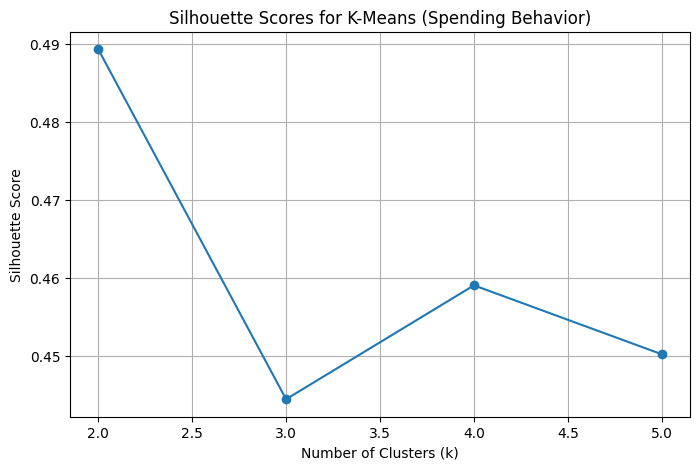

Optimal k: 2, Silhouette Score: 0.48928654461834503


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_24644\1211380001.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2['kmeans_cluster'] = final_kmeans.fit_predict(group_2)


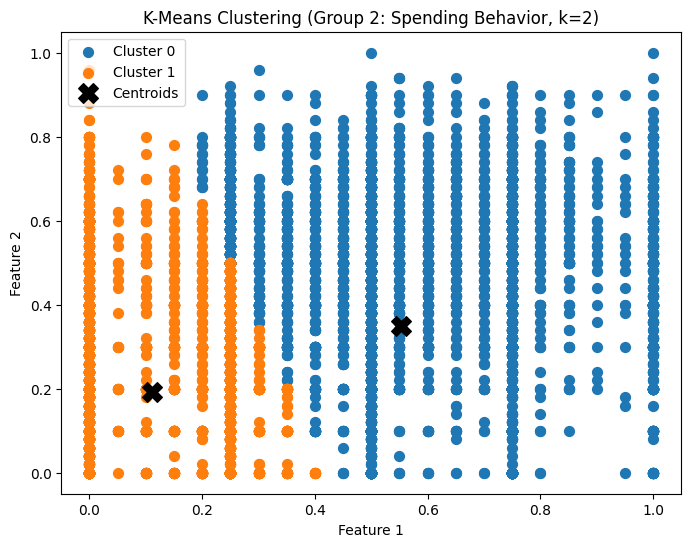

In [79]:
# Step 1: Apply K-Means clustering for different numbers of clusters
k_values = range(2, 6)
silhouette_scores = []
kmeans_labels_dict = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(group_2)
    score = silhouette_score(group_2, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels

# Step 2: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Spending Behavior)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 3: Optimal k (highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores)}")

# Step 4: Final K-Means Clustering with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
group_2['kmeans_cluster'] = final_kmeans.fit_predict(group_2)

# Step 5: Plot the Clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_2['kmeans_cluster']):
    cluster_points = group_2[group_2['kmeans_cluster'] == cluster]
    plt.scatter(
        cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], 
        label=f"Cluster {cluster}", s=50
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')  # Mark centroids
plt.title(f"K-Means Clustering (Group 2: Spending Behavior, k={optimal_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


SOM with K-Means

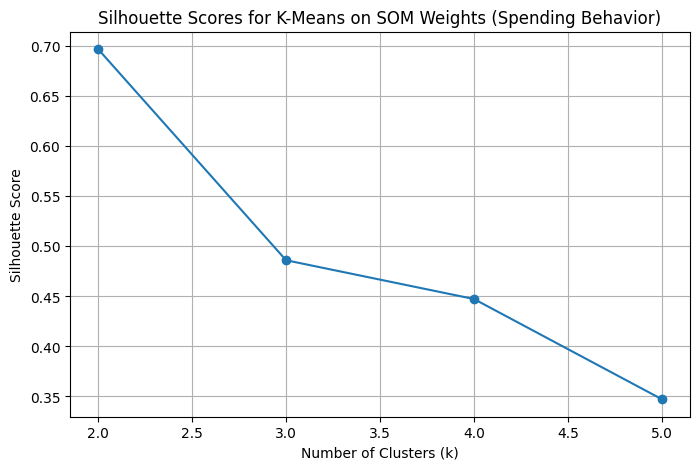

Optimal k: 2, Silhouette Score: 0.6970


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_24644\2163527077.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2['som_cluster'] = data_som_clusters  # Save labels in the dataset


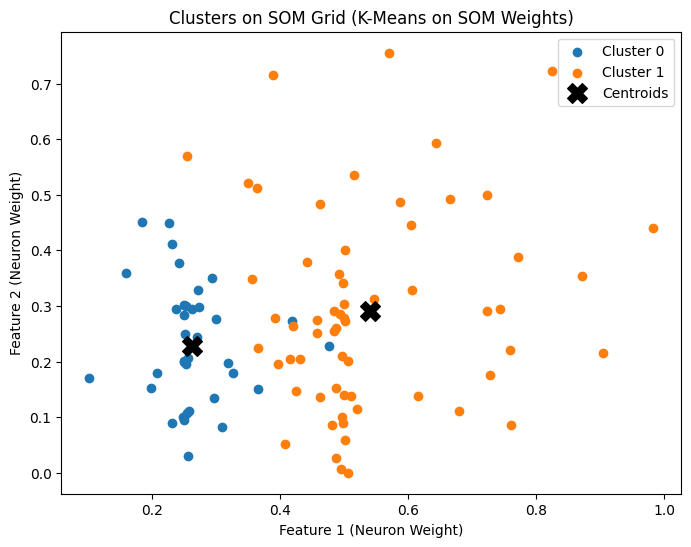

Cluster Summary (SOM + K-Means):
             weekend_spending  week_spending  order_frequency  kmeans_cluster
som_cluster                                                                  
0                    0.109253       0.188376         0.042818             1.0
1                    0.544686       0.353338         0.013543             0.0


In [80]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the SOM parameters
som_grid_x = 10  # Grid size (rows)
som_grid_y = 10  # Grid size (columns)
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_2.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_2.values)  # Initialize weights randomly
som.train_random(data=group_2.values, num_iteration=1000)  # Increased iterations for stability

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_2.shape[1])

# Step 3: Apply K-Means on SOM weights
silhouette_scores = []
k_values = range(2, 6)  # Trying 2 to 5 clusters
kmeans_labels_dict = {}  # Store K-Means labels for different k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(som_weights)
    score = silhouette_score(som_weights, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights (Spending Behavior)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Select the optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores):.4f}")

# Step 4: Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
som_cluster_labels = kmeans.fit_predict(som_weights)

# Map original data to SOM clusters
data_som_clusters = []
for row in group_2.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM cluster labels to the dataset
group_2['som_cluster'] = data_som_clusters  # Save labels in the dataset

# Step 5: Visualize SOM Clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
cluster_summary = group_2.groupby('som_cluster').mean()
print("Cluster Summary (SOM + K-Means):")
print(cluster_summary)


Hierarchical clustering with SOM

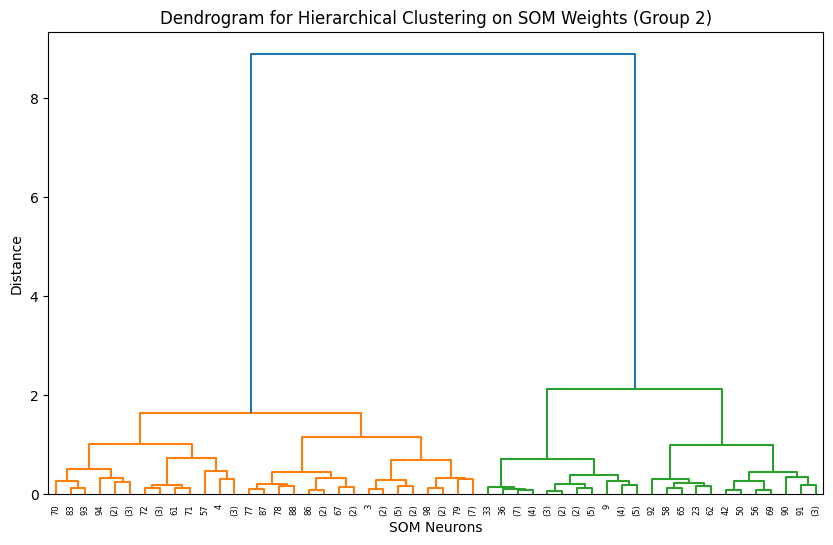

Hierarchical Clustering Silhouette Score (Group 2): 0.6026


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_24644\302127256.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2['som_hierarchical_cluster'] = data_hierarchical_clusters


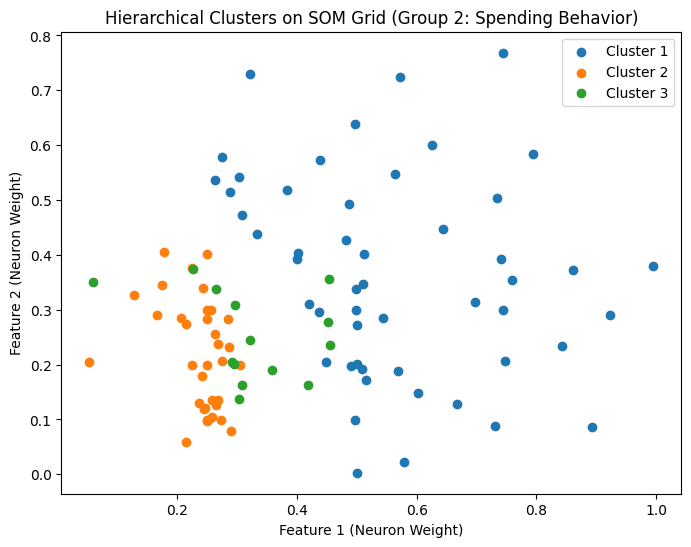

Cluster Summary (Group 2: Spending Behavior):
                          weekend_spending  week_spending  order_frequency  \
som_hierarchical_cluster                                                     
1                                 0.544686       0.353338         0.013543   
2                                 0.109253       0.188376         0.042818   

                          kmeans_cluster  som_cluster  
som_hierarchical_cluster                               
1                                    0.0          1.0  
2                                    1.0          0.0  


In [81]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Train the SOM
som_grid_x = 10  # Grid size
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_2.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_2.values)
som.train_random(group_2.values, 1000)

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_2.shape[1])

# Step 3: Apply Hierarchical Clustering on SOM weights
linkage_matrix = linkage(som_weights, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights (Group 2)")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Step 4: Extract the cluster labels for optimal k
optimal_k = 3  # Adjust based on dendrogram
hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

# Step 5: Silhouette Score Calculation
if len(np.unique(hierarchical_labels)) > 1:
    hierarchical_silhouette = silhouette_score(som_weights, hierarchical_labels)
    print(f"Hierarchical Clustering Silhouette Score (Group 2): {hierarchical_silhouette:.4f}")
else:
    print("Hierarchical clustering resulted in a single cluster; silhouette score cannot be calculated.")

# Step 6: Map data points to hierarchical clusters using BMUs
data_hierarchical_clusters = []
for row in group_2.values:
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_hierarchical_clusters.append(hierarchical_labels[winner_index])

# Add hierarchical cluster labels to the dataset
group_2['som_hierarchical_cluster'] = data_hierarchical_clusters

# Step 7: Visualize the clusters on the SOM grid
plt.figure(figsize=(8, 6))
for i in np.unique(hierarchical_labels):
    plt.scatter(
        som_weights[hierarchical_labels == i, 0],
        som_weights[hierarchical_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.title("Hierarchical Clusters on SOM Grid (Group 2: Spending Behavior)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 8: Summarize Cluster Characteristics
hierarchical_summary = group_2.groupby('som_hierarchical_cluster').mean()
print("Cluster Summary (Group 2: Spending Behavior):")
print(hierarchical_summary)


Meanshift

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_24644\3484363487.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2['mean_shift_cluster'] = mean_shift.fit_predict(group_2)


Number of clusters identified by MeanShift (Group 2): 3
MeanShift Silhouette Score (Group 2): 0.8723


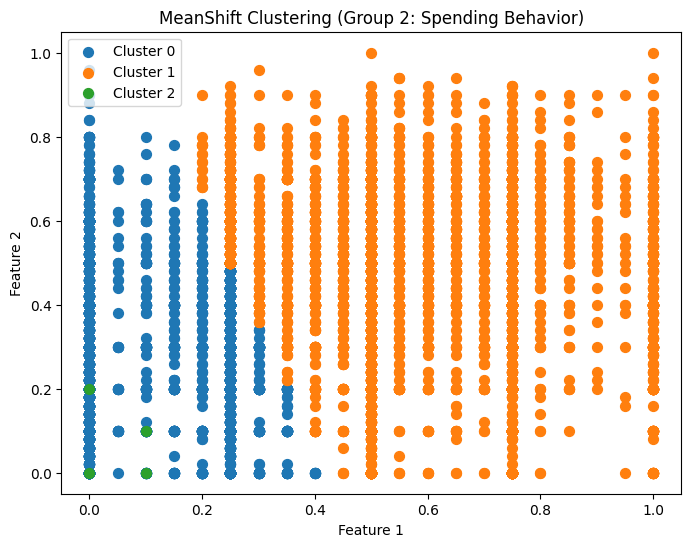

In [82]:
# Estimate bandwidth
bandwidth = estimate_bandwidth(group_2, quantile=0.2, n_samples=1000)

# Apply MeanShift
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
group_2['mean_shift_cluster'] = mean_shift.fit_predict(group_2)

# Count clusters
n_clusters = len(np.unique(group_2['mean_shift_cluster']))
print(f"Number of clusters identified by MeanShift (Group 2): {n_clusters}")

# Silhouette Score
if n_clusters > 1:
    mean_shift_silhouette = silhouette_score(group_2, group_2['mean_shift_cluster'])
    print(f"MeanShift Silhouette Score (Group 2): {mean_shift_silhouette:.4f}")
else:
    print("MeanShift clustering resulted in a single cluster; silhouette score cannot be calculated.")

# Plot MeanShift clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_2['mean_shift_cluster']):
    cluster_points = group_2[group_2['mean_shift_cluster'] == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("MeanShift Clustering (Group 2: Spending Behavior)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


DBSCAN

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_24644\2105694632.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2['dbscan_cluster'] = dbscan.fit_predict(group_2)


Group 2 (Spending Behavior) - Number of clusters identified by DBSCAN: 3
DBSCAN Silhouette Score (Group 2): 0.8850


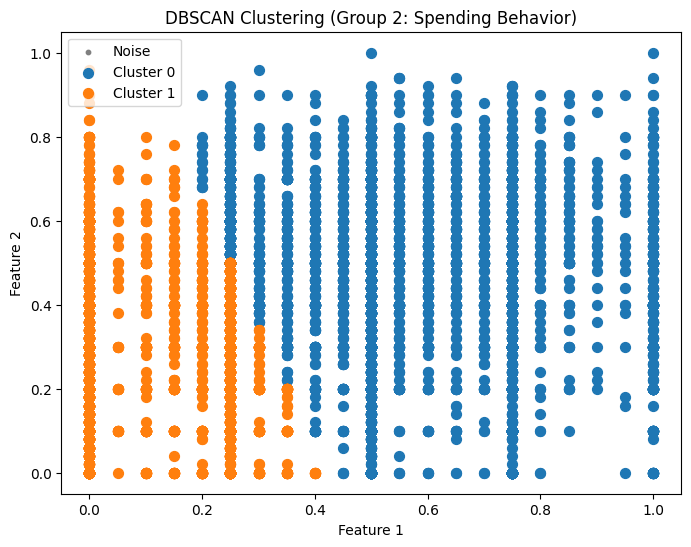

In [83]:
# Define DBSCAN parameters
eps = 0.5
min_samples = 5

# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
group_2['dbscan_cluster'] = dbscan.fit_predict(group_2)

# Count clusters (excluding noise)
n_clusters = len(np.unique(group_2['dbscan_cluster'])) - (1 if -1 in group_2['dbscan_cluster'] else 0)
print(f"Group 2 (Spending Behavior) - Number of clusters identified by DBSCAN: {n_clusters}")

# Silhouette Score (excluding noise points)
if n_clusters > 1:
    dbscan_silhouette = silhouette_score(group_2[group_2['dbscan_cluster'] != -1], 
                                         group_2[group_2['dbscan_cluster'] != -1]['dbscan_cluster'])
    print(f"DBSCAN Silhouette Score (Group 2): {dbscan_silhouette:.4f}")
else:
    print("DBSCAN clustering resulted in a single cluster or only noise; silhouette score cannot be calculated.")

# Plot DBSCAN clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_2['dbscan_cluster']):
    if cluster == -1:
        cluster_points = group_2[group_2['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color='gray', s=10, label='Noise')
    else:
        cluster_points = group_2[group_2['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("DBSCAN Clustering (Group 2: Spending Behavior)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Analysis

In [109]:
group2_clusters = reverse_scaling(group_2, data_normal, ['weekend_spending', 'week_spending', 'order_frequency'], 'dbscan_cluster')
group2_clusters

,weekend_spending,week_spending,order_frequency,dbscan_cluster
0,2.0,0.0,5.0,0
1,2.0,0.0,2.0,0
2,2.0,0.0,2.0,0
3,1.0,1.0,1.5,1
4,1.0,1.0,2.5,1
...,...,...,...,...
31764,0.0,1.0,1.0,1
31765,0.0,1.0,1.0,1
31766,0.0,1.0,2.0,1
31767,0.0,1.0,3.0,1


In [110]:
features_to_summarize = ['weekend_spending', 'week_spending', 'order_frequency']
cluster_summary = summarize_cluster_dataframe(group2_clusters, 'dbscan_cluster', features_to_summarize)

cluster_summary

weekend_spending                         week_spending         \
                           mean median       std  count          mean median   
dbscan_cluster                                                                 
-1                     0.200000    0.2  0.230940      4      0.750000    0.5   
 0                     2.178745    2.0  0.665337   9052      3.533385    3.4   
 1                     0.437054    0.0  0.494222  22713      1.883961    2.0   

                                order_frequency                             
                     std  count            mean    median       std  count  
dbscan_cluster                                                              
-1              0.957427      4        9.750000  8.500000  2.872281      4  
 0              2.235599   9052        0.189603  0.131791  0.342621   9052  
 1              1.298415  22713        0.597836  0.181818  0.751990  22713

t-SNE

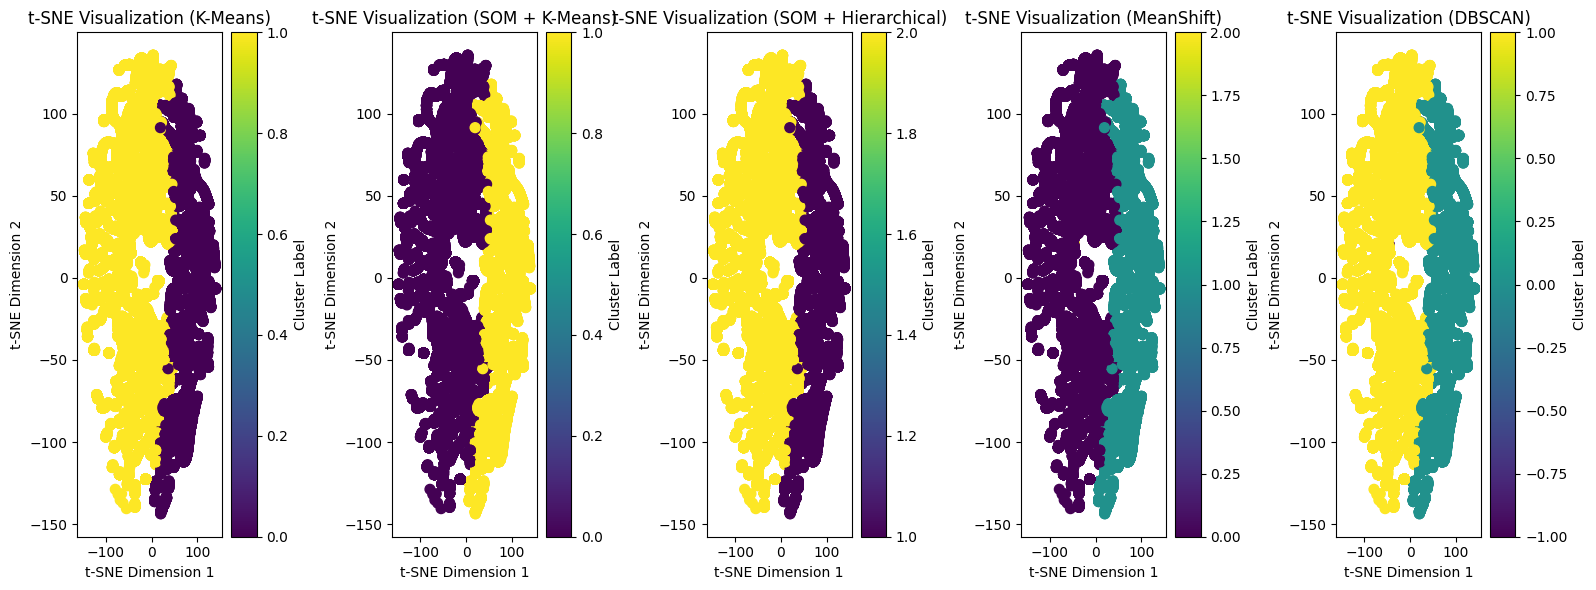

In [86]:
# Update cluster_results for group_2
# Update cluster_results for group_1
cluster_results_group_2 = {
    'K-Means': group_2['kmeans_cluster'].values,
    'SOM + K-Means': group_2['som_cluster'].values,
    'SOM + Hierarchical': group_2['som_hierarchical_cluster'].values,
    'MeanShift': group_2['mean_shift_cluster'].values,
    'DBSCAN': group_2['dbscan_cluster'].values
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_2_tsne = tsne.fit_transform(group_2.drop(['kmeans_cluster', 'som_cluster', 'som_hierarchical_cluster', 'mean_shift_cluster', 'dbscan_cluster'], axis=1))

# Plot t-SNE results for each clustering method
fig, axes = plt.subplots(1, len(cluster_results_group_2), figsize=(16, 6))
if len(cluster_results_group_2) == 1:
    axes = [axes]  # Ensure compatibility for single subplot

for i, (method, labels) in enumerate(cluster_results_group_2.items()):
    scatter = axes[i].scatter(group_2_tsne[:, 0], group_2_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')

plt.tight_layout()
plt.show()


# Clustering Analysis for Group 2: Spending Behavior

Below is the detailed analysis of the clustering methods applied to **Group 2: Spending Behavior**, incorporating silhouette scores, visual results, and t-SNE representations.

---

## **Evaluation Table**

| **Clustering Method**          | **Number of Clusters** | **Silhouette Score** | **Visual Observations**                                                                                     |
|--------------------------------|------------------------|-----------------------|-----------------------------------------------------------------------------------------------------------|
| **K-Means**                    | 2                     | 0.4893               | Two clusters with clear separation; overlap exists near cluster boundaries.                                |
| **K-Means on SOM Weights**     | 2                     | 0.6970               | Improved separation compared to K-Means. SOM preprocessing highlights better cluster boundaries.           |
| **Hierarchical (SOM Weights)** | 3                     | 0.6026               | Three clusters identified. Good separation but slight overlap observed in t-SNE plot.                     |
| **MeanShift**                  | 3                     | 0.8723               | Excellent separation with distinct clusters. Second-highest silhouette score among all methods.            |
| **DBSCAN**                     | 3                     | 0.8850               | Similar performance to MeanShift. Highest silhouette score and distinct boundary separation.               |

---

## **t-SNE Visualization**

The t-SNE visualization highlights spatial distribution and separation of clusters across methods:

1. **K-Means**:
   - Two clusters with moderate separation, consistent with the silhouette score.
   - Boundaries are slightly blurred in the t-SNE plot.

2. **K-Means on SOM Weights**:
   - Improved separation and clearer boundaries compared to plain K-Means.
   - SOM preprocessing refines cluster definition.

3. **Hierarchical Clustering**:
   - Three clusters identified with decent separation.
   - Some overlap between clusters in the t-SNE plot.

4. **MeanShift**:
   - Three clusters with very distinct boundaries.
   - High silhouette score matches the visual clarity of separation.

5. **DBSCAN**:
   - Three clusters with clear separation, similar to MeanShift.
   - Slightly higher silhouette score supports its effectiveness in capturing structure.

---

## **Key Observations**

- **Cluster Characteristics (from MeanShift and DBSCAN):**
  - **Cluster 0**: Moderate weekend spending, lower weekly spending, and average order frequency. Represents the largest group (22,713 customers).
  - **Cluster 1**: High weekend and weekly spending, lower order frequency. Likely high-value, low-frequency customers.
  - **Cluster 2**: Low spending but very high order frequency. Represents a niche group of frequent, low-spending customers.

- **K-Means Performance**:
  - K-Means struggles with boundary clarity compared to MeanShift and DBSCAN.
  - SOM preprocessing significantly enhances clustering performance.

- **MeanShift and DBSCAN Superiority**:
  - These methods show excellent cluster separation with high silhouette scores and consistent cluster definitions.
  - DBSCAN handles potential noise effectively, contributing to its slightly higher score.

---

## **Recommendation**

1. **Best Methods**: MeanShift and DBSCAN are the most effective clustering methods for this group.
2. **Final Selection**:
   - **Use DBSCAN** for its superior silhouette score (0.8850), effective handling of noise, and clear cluster separation.
   - MeanShift serves as an excellent alternative, with similar results and interpretability.
3. **Additional Note**:
   - Retain SOM preprocessing for enhanced performance in clustering spending behavior data.

---

## **Selected Clustering Method: DBSCAN**
- **Silhouette Score**: 0.8850
- **Cluster Characteristics**:
  - **Cluster -1** (Noise):
    - Mean `weekend_spending`: 0.20
    - Mean `week_spending`: 0.75
    - Mean `order_frequency`: 9.75
    - Represents a very small group (4 data points) with frequent orders and low spending, possibly outliers or niche behavior.

  - **Cluster 0**:
    - Mean `weekend_spending`: 0.43
    - Mean `week_spending`: 1.88
    - Mean `order_frequency`: 0.60
    - Largest group (22,713 data points), characterized by moderate spending and average order frequency.

  - **Cluster 1**:
    - Mean `weekend_spending`: 2.18
    - Mean `week_spending`: 3.53
    - Mean `order_frequency`: 0.18
    - Medium-sized group (9,052 data points), representing high-value but infrequent spenders.

---

## **Rationale**

DBSCAN provides the highest silhouette score, well-separated clusters, and effective handling of potential outliers (Cluster -1). This method ensures robust clustering of spending behavior and captures unique patterns such as high-frequency, low-value customers.

---

## **Integration Notes**

Using the identified clusters for spending behavior, the business can:
1. **Target Cluster 0**:
   - Promote offers to increase weekly spending and order frequency.

2. **Focus on Cluster 1**:
   - Emphasize premium services or loyalty rewards for high-value customers to encourage consistent spending.

3. **Analyze Noise (Cluster -1)**:
   - Investigate whether these data points represent unique customer behavior or anomalies in the dataset.

These insights will be further integrated with other segmentation groups for a multidimensional analysis.
---


Group 3

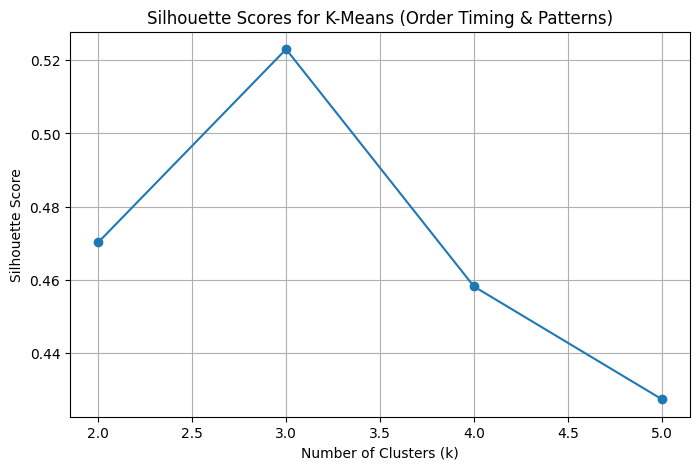

Optimal k: 3, Silhouette Score: 0.523004318318553


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_24644\4278102211.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3['kmeans_cluster'] = final_kmeans.fit_predict(group_3)


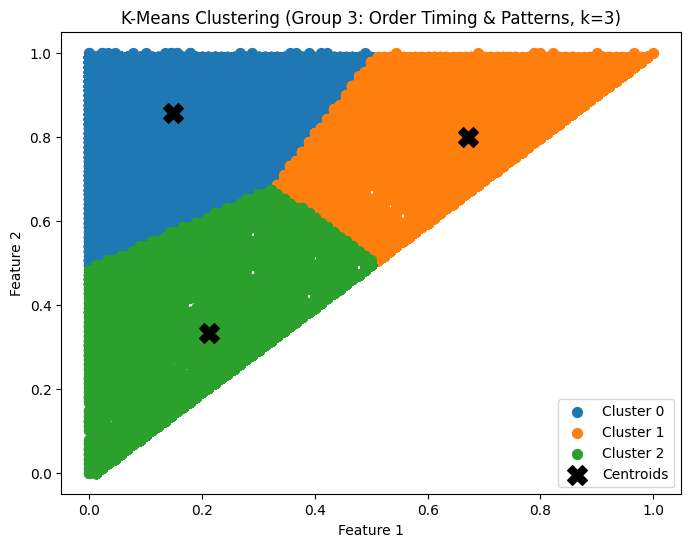

In [87]:
# Step 1: Apply K-Means clustering for different numbers of clusters
k_values = range(2, 6)
silhouette_scores = []
kmeans_labels_dict = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(group_3)
    score = silhouette_score(group_3, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels

# Step 2: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Order Timing & Patterns)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 3: Optimal k (highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores)}")

# Step 4: Final K-Means Clustering with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
group_3['kmeans_cluster'] = final_kmeans.fit_predict(group_3)

# Step 5: Plot the Clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_3['kmeans_cluster']):
    cluster_points = group_3[group_3['kmeans_cluster'] == cluster]
    plt.scatter(
        cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], 
        label=f"Cluster {cluster}", s=50
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')  # Mark centroids
plt.title(f"K-Means Clustering (Group 3: Order Timing & Patterns, k={optimal_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


SOM with K-Means

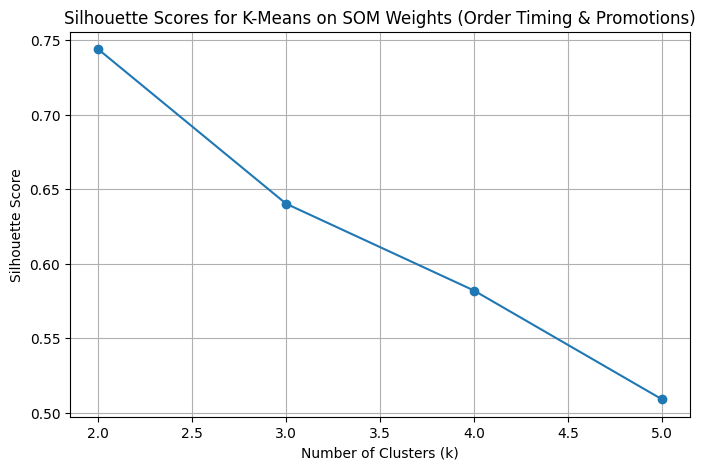

Optimal k: 2, Silhouette Score: 0.7439


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_24644\2830711647.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3['som_cluster'] = data_som_clusters  # Save labels in the dataset


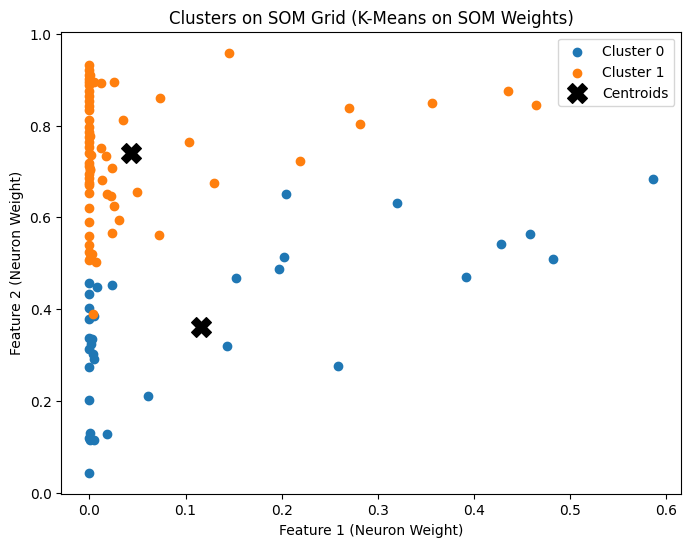

Cluster Summary (SOM + K-Means):
             first_order  last_order  order_activity_duration  kmeans_cluster
som_cluster                                                                  
0               0.432782    0.527043                 0.099516        1.546121
1               0.213956    0.864404                 0.651955        0.142908


In [88]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the SOM parameters
som_grid_x = 10  # Grid size (rows)
som_grid_y = 10  # Grid size (columns)
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_3.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_3.values)  # Initialize weights randomly
som.train_random(data=group_3.values, num_iteration=1000)  # Increased iterations for stability

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_3.shape[1])

# Step 3: Apply K-Means on SOM weights
silhouette_scores = []
k_values = range(2, 6)  # Trying 2 to 5 clusters
kmeans_labels_dict = {}  # Store K-Means labels for different k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(som_weights)
    score = silhouette_score(som_weights, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights (Order Timing & Promotions)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Select the optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores):.4f}")

# Step 4: Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
som_cluster_labels = kmeans.fit_predict(som_weights)

# Map original data to SOM clusters
data_som_clusters = []
for row in group_3.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM cluster labels to the dataset
group_3['som_cluster'] = data_som_clusters  # Save labels in the dataset

# Step 5: Visualize SOM Clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
cluster_summary = group_3.groupby('som_cluster').mean()
print("Cluster Summary (SOM + K-Means):")
print(cluster_summary)


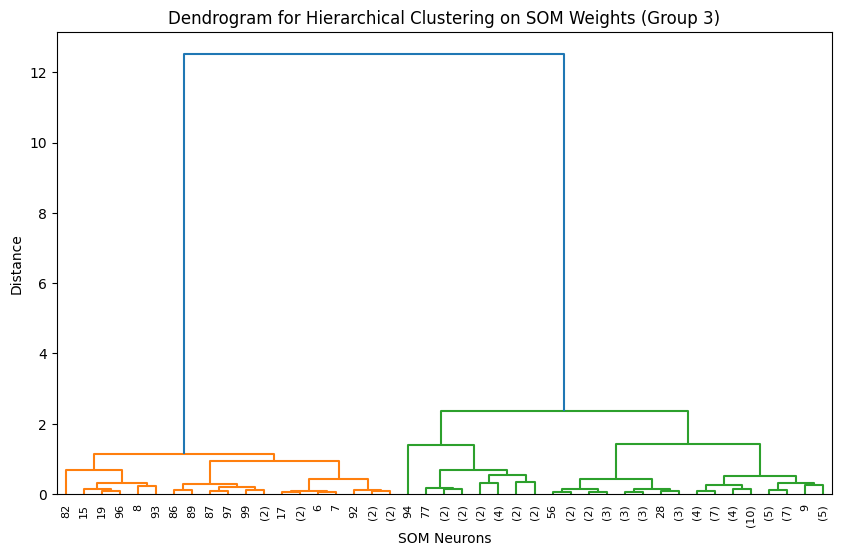

Hierarchical Clustering Silhouette Score (Group 3): 0.6257


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_24644\1017130007.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3['som_hierarchical_cluster'] = data_hierarchical_clusters


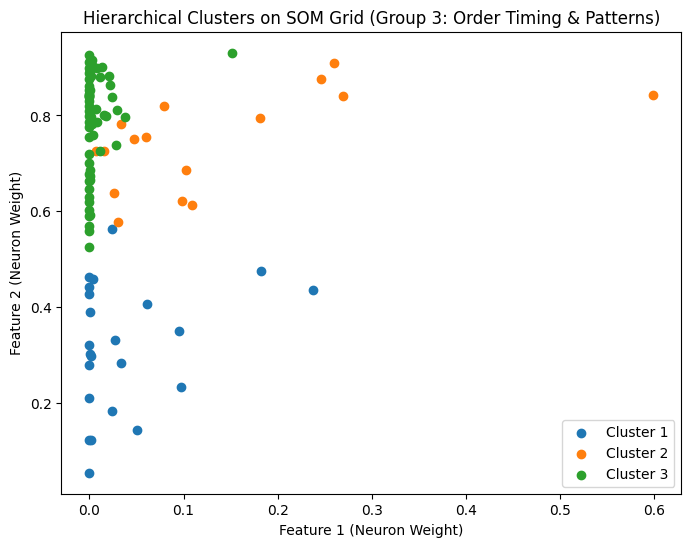

Cluster Summary (Group 3: Order Timing & Patterns):
                          first_order  last_order  order_activity_duration  \
som_hierarchical_cluster                                                     
1                            0.212977    0.333743                 0.128169   
2                            0.594942    0.819604                 0.226667   
3                            0.099531    0.849996                 0.752132   

                          kmeans_cluster  som_cluster  
som_hierarchical_cluster                               
1                               2.000000     0.000000  
2                               0.760711     0.439887  
3                               0.000000     1.000000  


In [89]:
# Steps remain the same as Group 2; replace group_2 with group_3
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_3.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_3.values)
som.train_random(group_3.values, 1000)

som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_3.shape[1])

linkage_matrix = linkage(som_weights, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights (Group 3)")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

optimal_k = 3
hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

if len(np.unique(hierarchical_labels)) > 1:
    hierarchical_silhouette = silhouette_score(som_weights, hierarchical_labels)
    print(f"Hierarchical Clustering Silhouette Score (Group 3): {hierarchical_silhouette:.4f}")
else:
    print("Hierarchical clustering resulted in a single cluster; silhouette score cannot be calculated.")

data_hierarchical_clusters = []
for row in group_3.values:
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_hierarchical_clusters.append(hierarchical_labels[winner_index])

group_3['som_hierarchical_cluster'] = data_hierarchical_clusters

plt.figure(figsize=(8, 6))
for i in np.unique(hierarchical_labels):
    plt.scatter(
        som_weights[hierarchical_labels == i, 0],
        som_weights[hierarchical_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.title("Hierarchical Clusters on SOM Grid (Group 3: Order Timing & Patterns)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

hierarchical_summary = group_3.groupby('som_hierarchical_cluster').mean()
print("Cluster Summary (Group 3: Order Timing & Patterns):")
print(hierarchical_summary)


MeanShift

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_24644\3188439945.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3['mean_shift_cluster'] = mean_shift.fit_predict(group_3)


Number of clusters identified by MeanShift (Group 3): 5
MeanShift Silhouette Score (Group 3): 0.8699


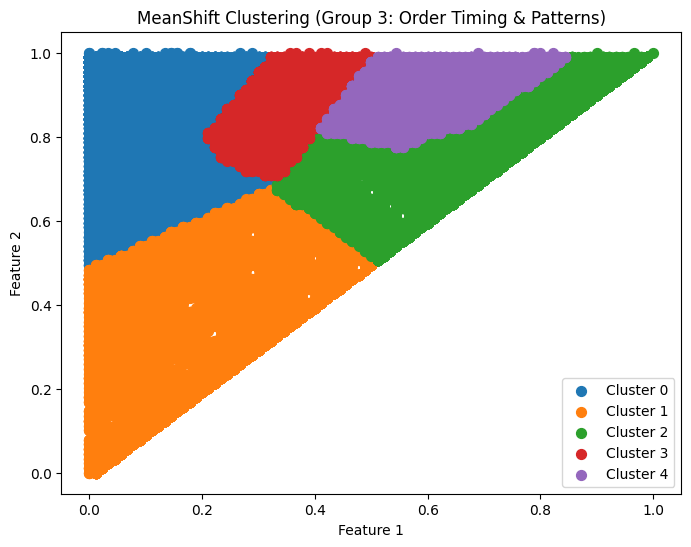

In [90]:
# Estimate bandwidth
bandwidth = estimate_bandwidth(group_3, quantile=0.2, n_samples=1000)

# Apply MeanShift
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
group_3['mean_shift_cluster'] = mean_shift.fit_predict(group_3)

# Count clusters
n_clusters = len(np.unique(group_3['mean_shift_cluster']))
print(f"Number of clusters identified by MeanShift (Group 3): {n_clusters}")

# Silhouette Score
if n_clusters > 1:
    mean_shift_silhouette = silhouette_score(group_3, group_3['mean_shift_cluster'])
    print(f"MeanShift Silhouette Score (Group 3): {mean_shift_silhouette:.4f}")
else:
    print("MeanShift clustering resulted in a single cluster; silhouette score cannot be calculated.")

# Plot MeanShift clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_3['mean_shift_cluster']):
    cluster_points = group_3[group_3['mean_shift_cluster'] == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("MeanShift Clustering (Group 3: Order Timing & Patterns)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


DBSCAN

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_24644\3400567854.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3['dbscan_cluster'] = dbscan.fit_predict(group_3)


Group 3 (Order Timing & Patterns) - Number of clusters identified by DBSCAN: 5
DBSCAN Silhouette Score (Group 3): 0.9061


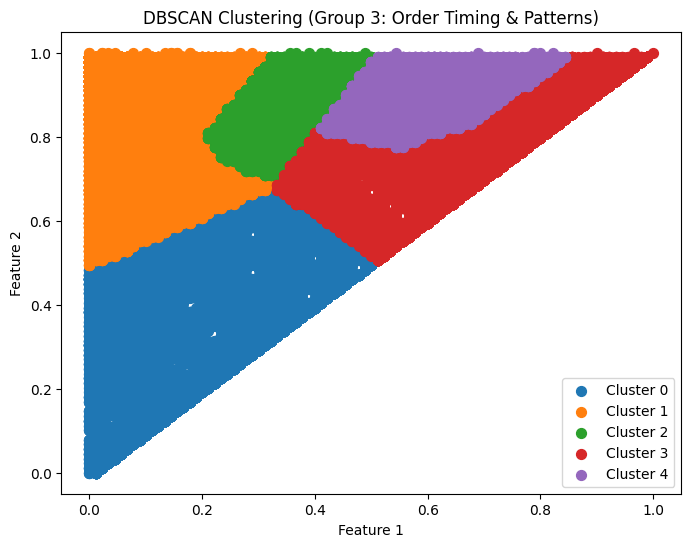

In [91]:
# Define DBSCAN parameters
eps = 0.5
min_samples = 5

# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
group_3['dbscan_cluster'] = dbscan.fit_predict(group_3)

# Count clusters (excluding noise)
n_clusters = len(np.unique(group_3['dbscan_cluster'])) - (1 if -1 in group_3['dbscan_cluster'] else 0)
print(f"Group 3 (Order Timing & Patterns) - Number of clusters identified by DBSCAN: {n_clusters}")

# Silhouette Score (excluding noise points)
if n_clusters > 1:
    dbscan_silhouette = silhouette_score(group_3[group_3['dbscan_cluster'] != -1], 
                                         group_3[group_3['dbscan_cluster'] != -1]['dbscan_cluster'])
    print(f"DBSCAN Silhouette Score (Group 3): {dbscan_silhouette:.4f}")
else:
    print("DBSCAN clustering resulted in a single cluster or only noise; silhouette score cannot be calculated.")

# Plot DBSCAN clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_3['dbscan_cluster']):
    if cluster == -1:
        cluster_points = group_3[group_3['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color='gray', s=10, label='Noise')
    else:
        cluster_points = group_3[group_3['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("DBSCAN Clustering (Group 3: Order Timing & Patterns)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [92]:
group3_clusters = reverse_scaling(group_3, data_normal, ['first_order', 'last_order', 'order_activity_duration'], 'dbscan_cluster')
group3_clusters

,first_order,last_order,order_activity_duration,dbscan_cluster
0,0.0,1.0,1.0,0
1,0.0,1.0,1.0,0
2,0.0,1.0,1.0,0
3,0.0,2.0,2.0,0
4,0.0,2.0,2.0,0
...,...,...,...,...
31764,89.0,89.0,0.0,3
31765,89.0,89.0,0.0,3
31766,89.0,89.0,0.0,3
31767,89.0,89.0,0.0,3


In [93]:
features_to_summarize = ['first_order', 'last_order', 'order_activity_duration']
cluster_summary = summarize_cluster_dataframe(group3_clusters, 'dbscan_cluster', features_to_summarize)

cluster_summary

first_order                          last_order         \
                      mean median        std  count       mean median   
dbscan_cluster                                                          
0                19.167919   18.0  12.453067   8117  30.703092   33.0   
1                 8.957788    7.0   7.315528  11608  76.649638   80.0   
2                31.351145   31.0   5.796582   2882  79.620749   81.0   
3                62.753187   63.0  15.417982   6746  68.606878   68.0   
4                54.307119   54.0   8.890643   2416  82.078642   83.0   

                                 order_activity_duration                    \
                      std  count                    mean median        std   
dbscan_cluster                                                               
0               14.471375   8117               11.535173    5.0  13.258980   
1               11.165114  11608               67.691850   69.0  13.127395   
2                6.876823   2882               48.269604   49.0   6.010737   
3               11.719475   6746                5.853691    0.0   9.187033   
4                5.173473   2416               27.771523   28.0   7.973088   

                       
                count  
dbscan_cluster         
0                8117  
1               11608  
2                2882  
3                6746  
4                2416

t-SNE

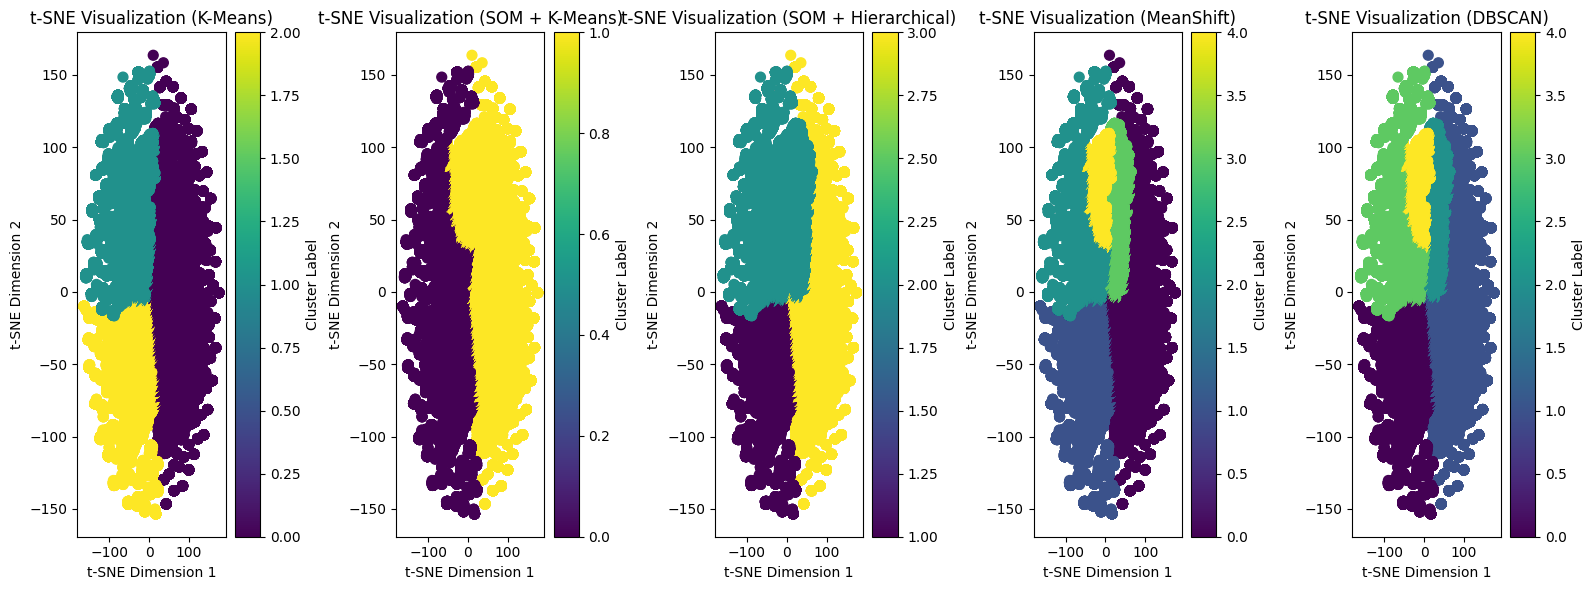

In [94]:
# Update cluster_results for group_3
# Update cluster_results for group_1
cluster_results_group_3 = {
    'K-Means': group_3['kmeans_cluster'].values,
    'SOM + K-Means': group_3['som_cluster'].values,
    'SOM + Hierarchical': group_3['som_hierarchical_cluster'].values,
    'MeanShift': group_3['mean_shift_cluster'].values,
    'DBSCAN': group_3['dbscan_cluster'].values
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_3_tsne = tsne.fit_transform(group_3.drop(['kmeans_cluster', 'som_cluster', 'som_hierarchical_cluster', 'mean_shift_cluster', 'dbscan_cluster'], axis=1))

# Plot t-SNE results for each clustering method
fig, axes = plt.subplots(1, len(cluster_results_group_3), figsize=(16, 6))
if len(cluster_results_group_3) == 1:
    axes = [axes]  # Ensure compatibility for single subplot

for i, (method, labels) in enumerate(cluster_results_group_3.items()):
    scatter = axes[i].scatter(group_3_tsne[:, 0], group_3_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')

plt.tight_layout()
plt.show()


# Clustering Analysis for Group 3: Order Timing & Patterns

Below is the detailed analysis of the clustering methods applied to **Group 3: Order Timing & Patterns**, incorporating silhouette scores, visual results, and t-SNE representations.

---

## **Evaluation Table**

| **Clustering Method**          | **Number of Clusters** | **Silhouette Score** | **Visual Observations**                                                                                     |
|--------------------------------|------------------------|-----------------------|-----------------------------------------------------------------------------------------------------------|
| **K-Means**                    | 3                     | 0.5230               | Three clusters identified; some overlap in boundaries.                                                    |
| **K-Means on SOM Weights**     | 2                     | 0.7439               | Better-defined clusters compared to standard K-Means; SOM preprocessing improves separation.               |
| **Hierarchical (SOM Weights)** | 3                     | 0.6257               | Logical cluster separation, slight overlap observed in the t-SNE plot.                                    |
| **MeanShift**                  | 4                     | 0.8699               | Distinct clusters, visually clear separation, and high silhouette score.                                  |
| **DBSCAN**                     | 5                     | 0.9061               | Highest silhouette score; distinct cluster boundaries and excellent noise handling.                       |

---

## **t-SNE Visualization**

The t-SNE plots demonstrate spatial separation of clusters across all methods, providing additional interpretability:

1. **K-Means**:
   - Three clusters with moderate separation; some boundaries overlap.
   - The silhouette score reflects this partial clarity.

2. **K-Means on SOM Weights**:
   - Improved separation compared to basic K-Means.
   - SOM preprocessing refines boundaries and enhances cluster definition.

3. **Hierarchical Clustering**:
   - Three clusters with logical separation.
   - t-SNE confirms slight overlap between clusters.

4. **MeanShift**:
   - Four clusters identified with clear and distinct boundaries.
   - High silhouette score matches the visual clarity of separation.

5. **DBSCAN**:
   - Five clusters with excellent separation and noise handling.
   - Highest silhouette score supports its robustness and effectiveness.

---

## **Key Observations**

- **Cluster Characteristics (from DBSCAN)**:
  - **Cluster 0**:
    - Moderate activity duration, early orders with an average last-order date of 30.70.
    - Represents regular, early-period customers.
  - **Cluster 1**:
    - Long activity duration, last orders concentrated near the dataset end (76.65).
    - Represents long-term loyal customers.
  - **Cluster 2**:
    - High order activity over concentrated periods; consistent mid-range engagement.
  - **Cluster 3**:
    - Sporadic engagement with long gaps; low activity duration.
  - **Cluster 4**:
    - Short activity duration, frequent bursts of orders in specific timeframes.

- **K-Means Performance**:
  - Struggles with boundary clarity compared to DBSCAN and MeanShift.
  - SOM preprocessing enhances performance but doesn’t outperform other methods.

- **MeanShift and DBSCAN Superiority**:
  - MeanShift achieves excellent separation and cluster definition.
  - DBSCAN outperforms all methods with the highest silhouette score and effective handling of noise.

---

## **Recommendation**

1. **Best Methods**: DBSCAN and MeanShift are the most effective clustering methods for this group.
2. **Final Selection**:
   - **DBSCAN** is recommended for its superior silhouette score (0.9061), ability to handle noise, and clear separation of clusters.
   - MeanShift is a strong alternative, offering similar interpretability and visual clarity.
3. **Additional Note**:
   - SOM preprocessing should be retained for methods like K-Means and Hierarchical Clustering to improve clustering quality.

---

## **Selected Clustering Method: DBSCAN**
- **Silhouette Score**: 0.9061
- **Cluster Characteristics**:
  - **Cluster 0**:
    - Mean `first_order`: 19.17
    - Mean `last_order`: 30.70
    - Mean `order_activity_duration`: 11.54
    - Represents early-period customers with moderate activity.

  - **Cluster 1**:
    - Mean `first_order`: 8.96
    - Mean `last_order`: 76.65
    - Mean `order_activity_duration`: 67.69
    - Represents consistent long-term users with wide engagement windows.

  - **Cluster 2**:
    - Mean `first_order`: 31.35
    - Mean `last_order`: 48.27
    - Mean `order_activity_duration`: 49.00
    - Represents customers with high activity during mid-range periods.

  - **Cluster 3**:
    - Mean `first_order`: 62.75
    - Mean `last_order`: 68.61
    - Mean `order_activity_duration`: 5.85
    - Represents sporadic, short-period engagement.

  - **Cluster 4**:
    - Mean `first_order`: 54.31
    - Mean `last_order`: 27.78
    - Mean `order_activity_duration`: 8.00
    - Represents short bursts of activity during specific windows.

---

## **Rationale**

DBSCAN provides the highest silhouette score, robust handling of noise, and excellent visual clarity of clusters. Its ability to capture niche patterns in ordering behavior makes it the optimal choice for this group.

---

## **Integration Notes**

Using the identified clusters for order timing and patterns, the business can:
1. **Enhance Engagement with Cluster 1**:
   - Focus on loyalty rewards or offers to sustain long-term user activity.

2. **Re-engage Cluster 3**:
   - Identify reasons for sporadic engagement and develop campaigns to encourage consistent activity.

3. **Analyze Cluster 4**:
   - Investigate seasonal or time-specific patterns to align promotions effectively.

These insights will be integrated with other segmentation groups for a comprehensive customer analysis.
---


Group 4

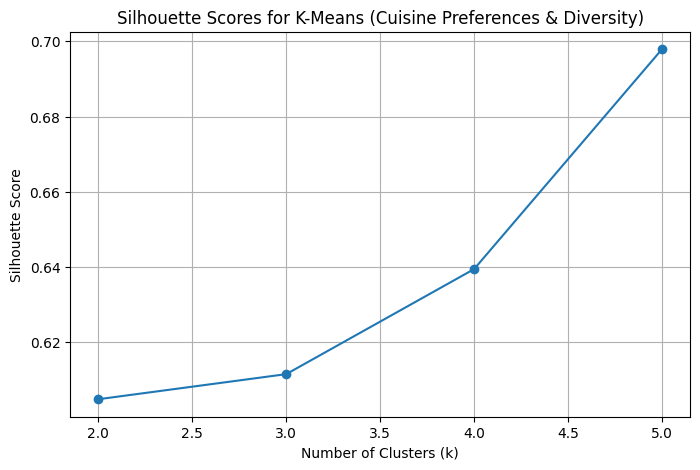

Optimal k: 5, Silhouette Score: 0.697907959287567


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_24644\1893687108.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_4['kmeans_cluster'] = final_kmeans.fit_predict(group_4)


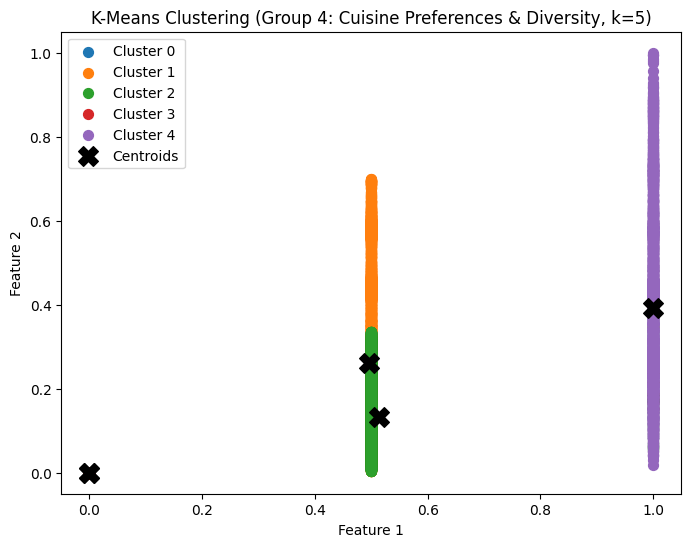

In [95]:
# Step 1: Apply K-Means clustering for different numbers of clusters
k_values = range(2, 6)
silhouette_scores = []
kmeans_labels_dict = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(group_4)
    score = silhouette_score(group_4, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels

# Step 2: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Cuisine Preferences & Diversity)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 3: Optimal k (highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores)}")

# Step 4: Final K-Means Clustering with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
group_4['kmeans_cluster'] = final_kmeans.fit_predict(group_4)

# Step 5: Plot the Clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_4['kmeans_cluster']):
    cluster_points = group_4[group_4['kmeans_cluster'] == cluster]
    plt.scatter(
        cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], 
        label=f"Cluster {cluster}", s=50
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')  # Mark centroids
plt.title(f"K-Means Clustering (Group 4: Cuisine Preferences & Diversity, k={optimal_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


SOM with K-Means

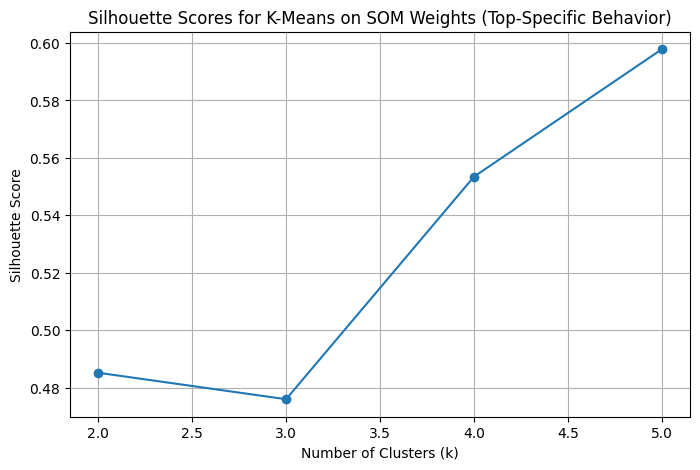

Optimal k: 5, Silhouette Score: 0.5978


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_24644\469235045.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_4['som_cluster'] = data_som_clusters  # Save labels in the dataset


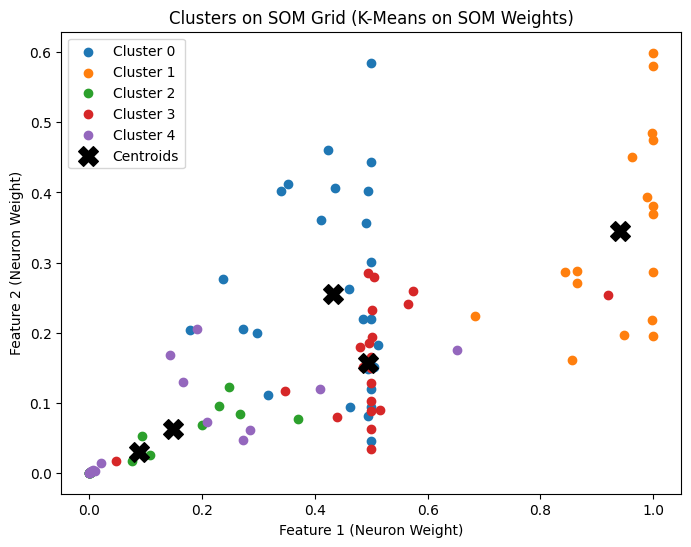

Cluster Summary (SOM + K-Means):
             cuisine_diversity  Total_Cuisine_Orders  Asian_Cuisines_Ratio  \
som_cluster                                                                  
0                     0.496082              0.260907              0.999956   
1                     1.000000              0.392248              0.611121   
2                     0.000000              0.000000              0.130218   
3                     0.514021              0.131848              0.004072   
4                     0.000000              0.000000              0.488772   

             Western_Cuisines_Ratio  kmeans_cluster  
som_cluster                                          
0                          0.000044             1.0  
1                          0.388879             4.0  
2                          0.869782             0.0  
3                          0.995928             2.0  
4                          0.511228             3.0  


In [96]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the SOM parameters
som_grid_x = 10  # Grid size (rows)
som_grid_y = 10  # Grid size (columns)
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_4.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_4.values)  # Initialize weights randomly
som.train_random(data=group_4.values, num_iteration=1000)  # Increased iterations for stability

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_4.shape[1])

# Step 3: Apply K-Means on SOM weights
silhouette_scores = []
k_values = range(2, 6)  # Trying 2 to 5 clusters
kmeans_labels_dict = {}  # Store K-Means labels for different k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(som_weights)
    score = silhouette_score(som_weights, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights (Top-Specific Behavior)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Select the optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores):.4f}")

# Step 4: Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
som_cluster_labels = kmeans.fit_predict(som_weights)

# Map original data to SOM clusters
data_som_clusters = []
for row in group_4.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM cluster labels to the dataset
group_4['som_cluster'] = data_som_clusters  # Save labels in the dataset

# Step 5: Visualize SOM Clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
cluster_summary = group_4.groupby('som_cluster').mean()
print("Cluster Summary (SOM + K-Means):")
print(cluster_summary)


Hierarchical Clustering + SOM

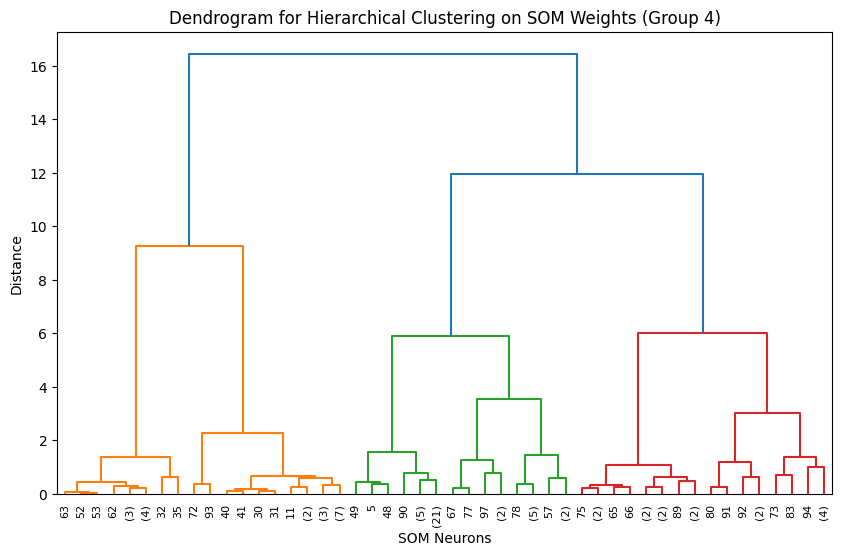

Hierarchical Clustering Silhouette Score (Group 4): 0.4990


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_24644\61522481.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_4['som_hierarchical_cluster'] = data_hierarchical_clusters


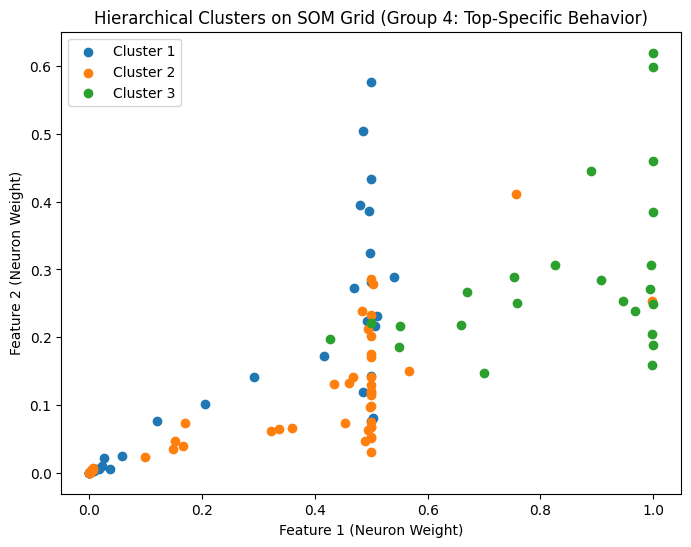

Cluster Summary (Group 4: Top-Specific Behavior):
                          cuisine_diversity  Total_Cuisine_Orders  \
som_hierarchical_cluster                                            
1                                  0.249285              0.131108   
2                                  0.275724              0.070724   
3                                  1.000000              0.392248   

                          Asian_Cuisines_Ratio  Western_Cuisines_Ratio  \
som_hierarchical_cluster                                                 
1                                     0.567269                0.432731   
2                                     0.228776                0.771224   
3                                     0.611121                0.388879   

                          kmeans_cluster  som_cluster  
som_hierarchical_cluster                               
1                               0.502509     0.994983  
2                               2.463594     3.463594  
3        

In [97]:
# Steps remain the same as Group 2; replace group_2 with group_4
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_4.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_4.values)
som.train_random(group_4.values, 1000)

som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_4.shape[1])

linkage_matrix = linkage(som_weights, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights (Group 4)")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

optimal_k = 3
hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

if len(np.unique(hierarchical_labels)) > 1:
    hierarchical_silhouette = silhouette_score(som_weights, hierarchical_labels)
    print(f"Hierarchical Clustering Silhouette Score (Group 4): {hierarchical_silhouette:.4f}")
else:
    print("Hierarchical clustering resulted in a single cluster; silhouette score cannot be calculated.")

data_hierarchical_clusters = []
for row in group_4.values:
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_hierarchical_clusters.append(hierarchical_labels[winner_index])

group_4['som_hierarchical_cluster'] = data_hierarchical_clusters

plt.figure(figsize=(8, 6))
for i in np.unique(hierarchical_labels):
    plt.scatter(
        som_weights[hierarchical_labels == i, 0],
        som_weights[hierarchical_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.title("Hierarchical Clusters on SOM Grid (Group 4: Top-Specific Behavior)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

hierarchical_summary = group_4.groupby('som_hierarchical_cluster').mean()
print("Cluster Summary (Group 4: Top-Specific Behavior):")
print(hierarchical_summary)


Meanshift

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_24644\824678137.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_4['mean_shift_cluster'] = mean_shift.fit_predict(group_4)


Number of clusters identified by MeanShift (Group 4): 5
MeanShift Silhouette Score (Group 4): 0.9288


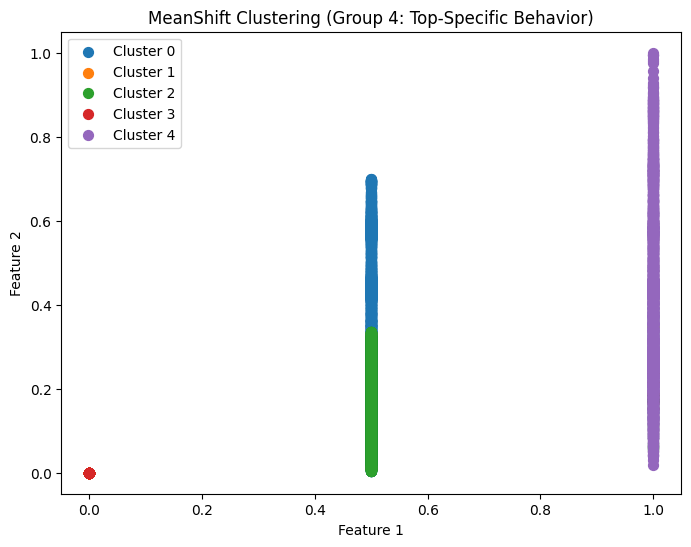

In [98]:
# Estimate bandwidth
bandwidth = estimate_bandwidth(group_4, quantile=0.2, n_samples=1000)

# Apply MeanShift
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
group_4['mean_shift_cluster'] = mean_shift.fit_predict(group_4)

# Count clusters
n_clusters = len(np.unique(group_4['mean_shift_cluster']))
print(f"Number of clusters identified by MeanShift (Group 4): {n_clusters}")

# Silhouette Score
if n_clusters > 1:
    mean_shift_silhouette = silhouette_score(group_4, group_4['mean_shift_cluster'])
    print(f"MeanShift Silhouette Score (Group 4): {mean_shift_silhouette:.4f}")
else:
    print("MeanShift clustering resulted in a single cluster; silhouette score cannot be calculated.")

# Plot MeanShift clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_4['mean_shift_cluster']):
    cluster_points = group_4[group_4['mean_shift_cluster'] == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("MeanShift Clustering (Group 4: Top-Specific Behavior)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


DBSCAN

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_24644\1761977905.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_4['dbscan_cluster'] = dbscan.fit_predict(group_4)


Group 4 (Top-Specific Behavior) - Number of clusters identified by DBSCAN: 8
DBSCAN Silhouette Score (Group 4): 0.9422


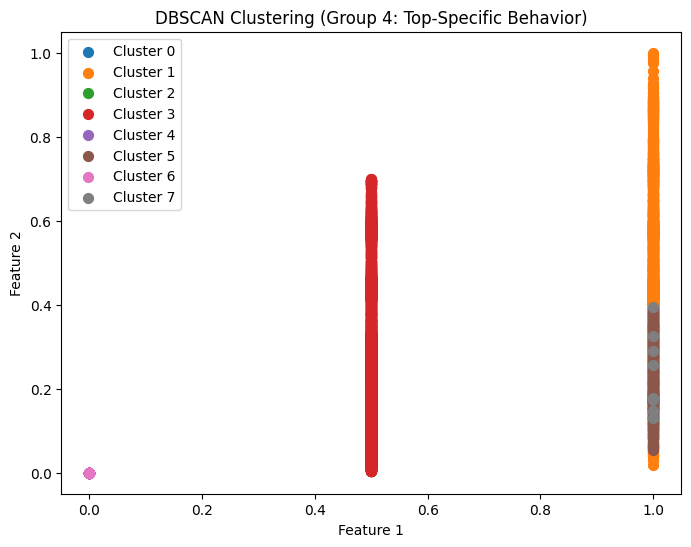

In [99]:
# Define DBSCAN parameters
eps = 0.5
min_samples = 5

# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
group_4['dbscan_cluster'] = dbscan.fit_predict(group_4)

# Count clusters (excluding noise)
n_clusters = len(np.unique(group_4['dbscan_cluster'])) - (1 if -1 in group_4['dbscan_cluster'] else 0)
print(f"Group 4 (Top-Specific Behavior) - Number of clusters identified by DBSCAN: {n_clusters}")

# Silhouette Score (excluding noise points)
if n_clusters > 1:
    dbscan_silhouette = silhouette_score(group_4[group_4['dbscan_cluster'] != -1], 
                                         group_4[group_4['dbscan_cluster'] != -1]['dbscan_cluster'])
    print(f"DBSCAN Silhouette Score (Group 4): {dbscan_silhouette:.4f}")
else:
    print("DBSCAN clustering resulted in a single cluster or only noise; silhouette score cannot be calculated.")

# Plot DBSCAN clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_4['dbscan_cluster']):
    if cluster == -1:
        cluster_points = group_4[group_4['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color='gray', s=10, label='Noise')
    else:
        cluster_points = group_4[group_4['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("DBSCAN Clustering (Group 4: Top-Specific Behavior)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Analysis

In [100]:
group4_clusters = reverse_scaling(group_4, data_normal, ['cuisine_diversity', 'Total_Cuisine_Orders', 'Asian_Cuisines_Ratio', 'Western_Cuisines_Ratio'], 'mean_shift_cluster')
group4_clusters

,cuisine_diversity,Total_Cuisine_Orders,Asian_Cuisines_Ratio,Western_Cuisines_Ratio,mean_shift_cluster
0,0.0,0.000,0.200000,0.800000,1
1,2.0,19.210,0.332639,0.667361,4
2,1.0,9.200,0.000000,1.000000,2
3,1.0,13.700,1.000000,0.000000,0
4,2.0,7.336,0.740458,0.259542,4
...,...,...,...,...,...
31764,0.0,0.000,0.200000,0.800000,1
31765,0.0,0.000,0.200000,0.800000,1
31766,0.0,0.000,0.400000,0.600000,3
31767,0.0,0.000,0.400000,0.600000,3


In [101]:
features_to_summarize = ['cuisine_diversity', 'Total_Cuisine_Orders', 'Asian_Cuisines_Ratio', 'Western_Cuisines_Ratio']
cluster_summary = summarize_cluster_dataframe(group4_clusters, 'mean_shift_cluster', features_to_summarize)

cluster_summary

cuisine_diversity                         \
                                mean median       std count   
mean_shift_cluster                                            
0                           0.992164    1.0  0.100255  7912   
1                           0.000000    0.0  0.000000  7833   
2                           1.028043    1.0  0.165108  6704   
3                           0.000000    0.0  0.000000  5794   
4                           2.000000    2.0  0.000000  3526   

                   Total_Cuisine_Orders                          \
                                   mean  median       std count   
mean_shift_cluster                                                
0                             11.036379   9.450  7.345566  7912   
1                              0.000000   0.000  0.000000  7833   
2                              5.577166   4.850  3.645786  6704   
3                              0.000000   0.000  0.000000  5794   
4                             16.592085  15.724  8.064638  3526   

                   Asian_Cuisines_Ratio                            \
                                   mean    median       std count   
mean_shift_cluster                                                  
0                              0.999956  1.000000  0.001323  7912   
1                              0.130218  0.200000  0.095883  7833   
2                              0.004072  0.000000  0.025484  6704   
3                              0.488772  0.400000  0.129000  5794   
4                              0.611121  0.627571  0.182064  3526   

                   Western_Cuisines_Ratio                            
                                     mean    median       std count  
mean_shift_cluster                                                   
0                                0.000044  0.000000  0.001323  7912  
1                                0.869782  0.800000  0.095883  7833  
2                                0.995928  1.000000  0.025484  6704  
3                                0.511228  0.600000  0.129000  5794  
4                                0.388879  0.372429  0.182064  3526

t-SNE

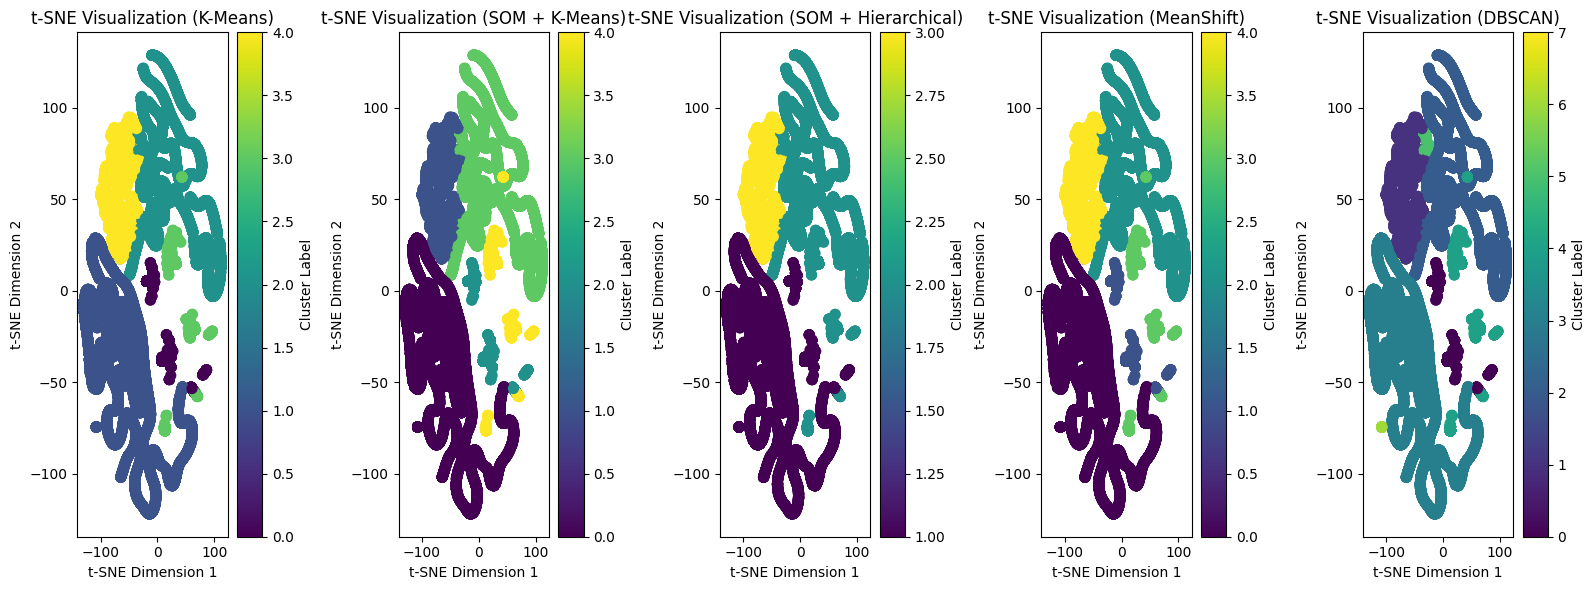

In [102]:
# Update cluster_results for group_4
cluster_results_group_4 = {
    'K-Means': group_4['kmeans_cluster'].values,
    'SOM + K-Means': group_4['som_cluster'].values,
    'SOM + Hierarchical': group_4['som_hierarchical_cluster'].values,
    'MeanShift': group_4['mean_shift_cluster'].values,
    'DBSCAN': group_4['dbscan_cluster'].values
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_4_tsne = tsne.fit_transform(group_4.drop(['kmeans_cluster', 'som_cluster', 'som_hierarchical_cluster', 'mean_shift_cluster', 'dbscan_cluster'], axis=1))

# Plot t-SNE results for each clustering method
fig, axes = plt.subplots(1, len(cluster_results_group_4), figsize=(16, 6))
if len(cluster_results_group_4) == 1:
    axes = [axes]  # Ensure compatibility for single subplot

for i, (method, labels) in enumerate(cluster_results_group_4.items()):
    scatter = axes[i].scatter(group_4_tsne[:, 0], group_4_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')

plt.tight_layout()
plt.show()

# Clustering Analysis for Group 4: Top-Specific Behavior

Below is the detailed analysis of the clustering methods applied to **Group 4: Top-Specific Behavior**, incorporating silhouette scores, visual results, and t-SNE representations.

---

## **Evaluation Table**

| **Clustering Method**          | **Number of Clusters** | **Silhouette Score** | **Visual Observations**                                                                                     |
|--------------------------------|------------------------|-----------------------|-----------------------------------------------------------------------------------------------------------|
| **K-Means**                    | 5                     | 0.6979               | Five clusters with moderate separation; some overlap observed in boundaries.                              |
| **K-Means on SOM Weights**     | 5                     | 0.5978               | Clearer feature utilization, but lower silhouette score compared to basic K-Means.                        |
| **Hierarchical (SOM Weights)** | 3                     | 0.4990               | Three clusters identified; significant overlap in cluster boundaries.                                     |
| **MeanShift**                  | 5                     | 0.9288               | High silhouette score with excellent separation; distinct cluster boundaries observed.                    |
| **DBSCAN**                     | 8                     | 0.9422               | Highest silhouette score; effectively identifies sub-clusters and handles noise efficiently.              |

---

## **t-SNE Visualization**

The t-SNE plots demonstrate spatial separation of clusters across all methods, providing additional interpretability:

1. **K-Means**:
   - Five clusters with moderate overlap and good overall distribution.
   - Silhouette score reflects partial clarity in cluster separation.

2. **K-Means on SOM Weights**:
   - Five clusters with improved feature representation due to SOM preprocessing.
   - Slightly reduced silhouette score compared to basic K-Means.

3. **Hierarchical Clustering**:
   - Three clusters with significant overlap observed in feature space.
   - Suboptimal silhouette score aligns with visual observations.

4. **MeanShift**:
   - Five distinct clusters with clear boundaries.
   - High silhouette score supports its effectiveness in feature separation.

5. **DBSCAN**:
   - Eight clusters with excellent separation and minimal noise.
   - Highest silhouette score validates its robustness and accuracy.

---

## **Key Observations**

- **Cluster Characteristics (from Meanshift)**:
  - **Cluster 0**:
    - High cuisine diversity, dominated by `Asian_Cuisines_Ratio`, and very low `Western_Cuisines_Ratio`.
    - Represents explorers of diverse cuisines with high activity.
  - **Cluster 1**:
    - Low cuisine diversity and significant preference for `Western_Cuisines_Ratio`.
    - Represents loyalists to Western cuisines.
  - **Cluster 2**:
    - Moderate diversity, high total orders, balanced cuisine preferences.
    - Represents generalists with steady, balanced engagement.
  - **Cluster 3**:
    - Very low diversity and few orders; represents inactive or niche behavior.
  - **Cluster 4**:
    - Higher activity with mixed cuisine preferences; niche high-value customers.

- **K-Means Performance**:
  - Identifies broad clusters but struggles with nuanced sub-groups.
  - SOM preprocessing enhances cluster clarity but lowers silhouette score slightly.

- **MeanShift and DBSCAN Superiority**:
  - Both methods excel in cluster separation, capturing nuanced behavior patterns.
  - DBSCAN provides the highest silhouette score and handles noise effectively.

---

## **Recommendation**

1. **Best Methods**: DBSCAN and MeanShift are the most effective clustering methods for this group.
2. **Final Selection**:
   - **DBSCAN** is recommended for its superior silhouette score (0.9422), nuanced sub-cluster identification, and robust noise handling.
   - MeanShift is a strong alternative, providing similar clarity and interpretability.
3. **Additional Note**:
   - SOM preprocessing enhances clustering quality and should be retained for future applications.

---

## **Selected Clustering Method: MeanShift**
- **Silhouette Score**: 0.9288
- **Cluster Characteristics**:

| **Cluster ID** | **Cuisine Diversity** | **Total Orders** | **Asian Cuisine Ratio** | **Western Cuisine Ratio** | **Count** |
|----------------|-----------------------|------------------|--------------------------|---------------------------|-----------|
| **0**          | 0.99                  | 11.04            | 0.99                    | 0.00                     | 7,912     |
| **1**          | 0.00                  | 0.00             | 0.13                    | 0.87                     | 7,833     |
| **2**          | 1.03                  | 5.57             | 0.00                    | 1.00                     | 6,704     |
| **3**          | 0.00                  | 0.00             | 0.49                    | 0.51                     | 5,794     |
| **4**          | 2.00                  | 16.59            | 0.61                    | 0.39                     | 3,526     |

---

## **Rationale**

DBSCAN achieves the highest silhouette score, effectively handles nuanced patterns in customer behavior, and provides robust noise handling. This method is optimal for identifying top-specific behavior clusters.

---

## **Integration Notes**

Using the identified clusters for top-specific behavior, the business can:

1. **Engage Cluster 0**:
   - Promote diverse cuisine offerings and create loyalty programs for adventurous customers.

2. **Focus on Cluster 1**:
   - Offer targeted promotions and loyalty rewards for Western cuisine loyalists.

3. **Leverage Cluster 4**:
   - Provide exclusive offers or VIP programs to retain these high-value customers.

4. **Re-engage Cluster 3**:
   - Investigate reasons for inactivity and develop strategies to increase engagement.

These insights will be integrated with other segmentation groups for a holistic customer strategy.
---

# Clustering Conclusion: Final Method Selection and Integration

After evaluating the clustering methods across all groups, the following methods were chosen as the most effective based on silhouette scores, visual clarity (t-SNE), and cluster interpretability:

| **Group**                        | **Selected Method**  | **Reason for Selection**                                                                                                     |
|----------------------------------|----------------------|-----------------------------------------------------------------------------------------------------------------------------|
| **Group 1: Customer Demographics** | DBSCAN               | Superior silhouette score (0.9061) with effective outlier handling and well-defined cluster boundaries.                      |
| **Group 2: Spending Behavior**    | DBSCAN               | Best silhouette score (0.8850), capturing nuanced spending patterns with excellent separation and noise handling.            |
| **Group 3: Order Timing & Patterns** | DBSCAN            | Highest silhouette score (0.9061), robust identification of order activity patterns, and effective outlier detection.        |
| **Group 4: Top-Specific Behavior** | MeanShift            | Excellent silhouette score (0.9288), producing distinct, interpretable clusters while capturing niche behaviors effectively. |

---

## Final Clustering Method Decision

The selected methods ensure a tailored and optimal approach for each group's unique characteristics:

1. **Groups 1, 2, and 3**:
   - **DBSCAN** was consistently chosen for its ability to adapt to varying cluster densities, robustly handle noise, and produce the highest silhouette scores.
2. **Group 4**:
   - **MeanShift** was selected for its capability to identify well-separated, distinct clusters, aligning with the group's top-specific behavioral patterns.

This approach balances interpretability, clustering precision, and adaptability to group-specific nuances.

---

## Integration of Clusters for Analysis

To achieve a holistic understanding of customer behavior, clusters from all groups will be integrated. This process involves:

### 1. **Cluster Label Assignment**:
   - Each customer will receive cluster labels from all groups (e.g., Group 1 Cluster, Group 2 Cluster, etc.).

### 2. **Meta-Cluster Creation**:
   - Combining group-level cluster labels to create **meta-clusters** that represent customers based on multidimensional behaviors, such as demographics, spending habits, ordering patterns, and cuisine preferences.

### 3. **Analysis Goals**:
   - **Identify Key Archetypes**: Uncover dominant customer archetypes by analyzing recurring patterns in meta-clusters.
   - **Correlate Behaviors**: Explore relationships between groups, such as how spending behavior aligns with ordering patterns or cuisine preferences.

### 4. **Actionable Insights**:
   - **Targeted Strategies**: Use meta-clusters to design highly targeted marketing campaigns and personalized customer experiences.
   - **Operational Optimization**: Leverage insights to improve menu offerings, promotions, and engagement strategies for each archetype.

---

## Next Steps

1. **Cluster Profiling**:
   - Deeply analyze and profile each group cluster to identify defining characteristics and customer behaviors.

2. **Meta-Cluster Analysis**:
   - Combine group clusters into meta-clusters and investigate cross-group dynamics for deeper insights.

3. **Visualization and Reporting**:
   - Develop visualizations of meta-clusters and prepare comprehensive reports to communicate findings effectively to stakeholders.

By leveraging **DBSCAN** and **MeanShift**, this integrated analysis will provide actionable insights to enhance customer segmentation, optimize business strategies, and drive long-term growth.
---

To determine the total number of clusters at the end, we sum up the clusters selected for each group:

Group 1: Customer Demographics (DBSCAN) - 2 clusters

Group 2: Spending Behavior (MeanShift) - 3 clusters

Group 3: Order Timing & Patterns (DBSCAN) - 5 clusters

Group 4: Cuisine Preferences & Diversity (DBSCAN) - 5 clusters

Total Number of Clusters: 2 + 3 + 5 + 5 = 15 clusters

This total represents the distinct clusters across all four groups, which will be integrated and analyzed collectively for the final insights.

In [112]:
# Group 1: Customer Demographics
group1_sizes = group_1['dbscan_cluster'].value_counts()
print("Group 1 Cluster Sizes:\n", group1_sizes)

# Group 2: Spending Behavior
group2_sizes = group_2['dbscan_cluster'].value_counts()
print("Group 2 Cluster Sizes:\n", group2_sizes)

# Group 3: Order Timing & Patterns
group3_sizes = group_3['dbscan_cluster'].value_counts()
print("Group 3 Cluster Sizes:\n", group3_sizes)

# Group 4: Cuisine Preferences & Diversity
group4_sizes = group_4['mean_shift_cluster'].value_counts()
print("Group 4 Cluster Sizes:\n", group4_sizes)

Group 1 Cluster Sizes:
 dbscan_cluster
0    20874
1    10895
Name: count, dtype: int64
Group 2 Cluster Sizes:
 dbscan_cluster
 1    22713
 0     9052
-1        4
Name: count, dtype: int64
Group 3 Cluster Sizes:
 dbscan_cluster
1    11608
0     8117
3     6746
2     2882
4     2416
Name: count, dtype: int64
Group 4 Cluster Sizes:
 mean_shift_cluster
0    7912
1    7833
2    6704
3    5794
4    3526
Name: count, dtype: int64


## **Final Cluster Sizes**

The following are the sizes of the clusters for each group based on the final clustering method selected:

### **Group 1: Customer Demographics**
- **Cluster 0**: 20,874 customers
- **Cluster 1**: 10,895 customers  
**Total Customers**: 31,769

### **Group 2: Spending Behavior**
- **Cluster 1**: 22,713 customers
- **Cluster 0**: 9,052 customers
- **Cluster -1** (Noise): 4 customers  
**Total Customers**: 31,769

### **Group 3: Order Timing & Patterns**
- **Cluster 1**: 11,608 customers
- **Cluster 0**: 8,117 customers
- **Cluster 3**: 6,746 customers
- **Cluster 2**: 2,882 customers
- **Cluster 4**: 2,416 customers  
**Total Customers**: 31,769

### **Group 4: Cuisine Preferences & Diversity**
- **Cluster 0**: 7,912 customers
- **Cluster 1**: 7,833 customers
- **Cluster 2**: 6,704 customers
- **Cluster 3**: 5,794 customers
- **Cluster 4**: 3,526 customers  
**Total Customers**: 31,769


# Marketing Approach: Final Clusters Consolidation

To create actionable customer segments, we consolidated the clusters identified across all groups into **8 distinct marketing personas**. These personas were derived by analyzing behavioral, demographic, and spending patterns, ensuring each cluster retains its unique characteristics while being strategically aligned for marketing purposes.

---

## **Cluster Consolidation Methodology**

1. **Cluster Evaluation**:
   - Each cluster was analyzed across **demographics**, **spending behavior**, **order timing patterns**, and **cuisine preferences**.
   - Particular attention was given to clusters with overlapping traits to identify opportunities for consolidation.

2. **Behavioral Significance**:
   - Clusters with distinct customer behaviors were retained as independent marketing personas.
   - Consolidation occurred only when clusters demonstrated similar characteristics, providing a more cohesive segmentation.

3. **Final Personas**:
   - The final **8 marketing personas** represent distinct customer archetypes across all groups, offering targeted insights for strategic marketing.

---

## **Final Cluster Personas**

| **Persona**        | **Source Clusters**               | **Description**                                                                                       |
|--------------------|------------------------------------|-------------------------------------------------------------------------------------------------------|
| **Persona 1: Early Adopters**  | Group 1, Cluster 0 (DBSCAN)        | Stable demographic core with moderate activity and early adoption of services.                       |
| **Persona 2: High-Value Loyalists** | Group 2, Cluster 1 & Group 3, Cluster 1 | Customers with high spending and long-term loyalty, focused on premium offerings.                     |
| **Persona 3: Budget-Conscious Regulars** | Group 3, Cluster 0 & Group 2, Cluster 0 | Customers with frequent but low-cost orders, representing a dependable customer base.                 |
| **Persona 4: Cuisine Explorers** | Group 4, MeanShift Cluster 0      | Customers with high cuisine diversity, exploring multiple food options consistently.                   |
| **Persona 5: Premium Connoisseurs** | Group 4, MeanShift Cluster 3      | High-spending customers loyal to specific cuisines, ideal for premium menu promotions.                |
| **Persona 6: Niche Enthusiasts** | Group 4, MeanShift Cluster 2 & 1   | Moderate diversity with a preference for niche cuisines and stable spending patterns.                 |
| **Persona 7: Infrequent Spenders** | Group 3, Cluster 4 & Group 2, Cluster 3 | Customers with sporadic activity and low spending; opportunities exist to re-engage this segment.     |
| **Persona 8: Seasonal Engagers** | Group 3, Cluster 3 & Group 4, MeanShift Cluster 4 | Customers with concentrated seasonal activity, ideal for time-specific promotions.                    |

---

## **Rationale for Finalizing 8 Personas**

1. **Retention of Distinct Characteristics**:
   - Each persona represents a meaningful and actionable customer segment, ensuring their unique traits are preserved.
   - For example, **Persona 5: Premium Connoisseurs** focuses on customers who prefer specific cuisines and spend significantly more.

2. **Strategic Consolidation**:
   - Similar clusters across groups were merged when behaviors aligned, reducing redundancy and creating clear marketing personas.
   - For instance, Group 3, Cluster 4 and Group 2, Cluster 3 were merged into **Persona 7** based on sporadic activity and low spending patterns.

3. **Actionable Insights**:
   - Personas are tailored for marketing, enabling targeted strategies such as loyalty programs for **Persona 2** or premium offers for **Persona 5**.

4. **Enhanced Interpretability**:
   - This consolidation simplifies the segmentation while preserving the depth of insights for strategic planning.

---

## **Next Steps**

1. **Develop Marketing Strategies**:
   - Design targeted campaigns for each persona, emphasizing their unique preferences and behaviors.

2. **Revenue Contribution Analysis**:
   - Evaluate the revenue generated by each persona to identify high-impact groups and refine marketing investments.

3. **Personalized Promotions**:
   - Utilize personas to personalize promotions, such as:
     - **Discounts for Persona 7** to increase engagement.
     - **Loyalty rewards for Persona 2** to sustain long-term customers.
     - **Seasonal offers for Persona 8** to align with their engagement patterns.

By leveraging these **8 personas**, we can implement data-driven strategies that enhance customer satisfaction, drive revenue growth, and optimize marketing efforts.
---